# Question 1

Load the data from the file *trajectory.csv*. The data consists of three rows representing a trajectory. The first row represents time, the second row represents the $x$-coordinate at each timestep, and the third row represents the $y$-coordinate.

**Q1 a (3 marks)**

Plot the $x$-coordinate against time (i.e., t-x figure) and also for the $y$-coordinate (i.e., t-y figure). Also plot the trajectory in 2D (i.e., x-y figure).

You need to respectively use variables 't', 'x', 'y' to represent time, x-coordinate, and y-coordinate, as these variables will be needed in other questions.

[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12
 0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18
 0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235 0.24
 0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295 0.3
 0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355 0.36
 0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415 0.42
 0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475 0.48
 0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535 0.54
 0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6
 0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655 0.66
 0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715 0.72
 0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775 0.78
 0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825 0.83  0.835

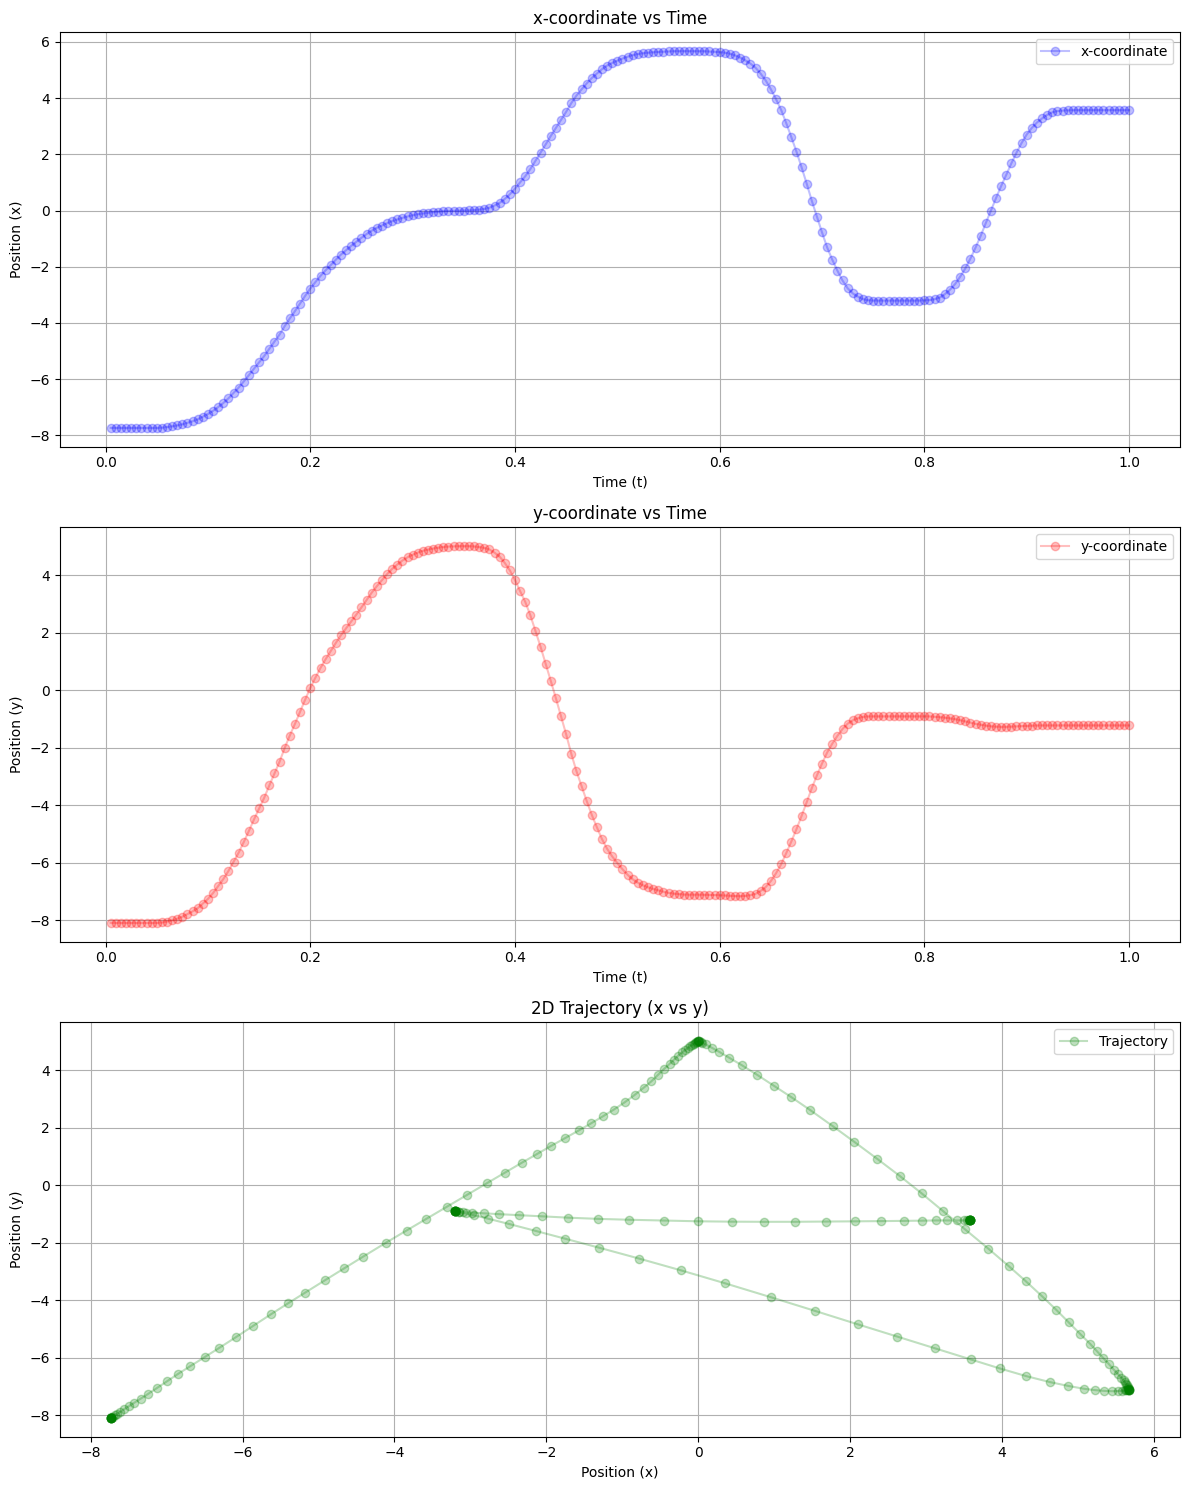

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('trajectory.csv', header=None)

# Extract the variables
t = data.iloc[1, 1:].astype(float).values  # First row without header
x = data.iloc[2, 1:].astype(float).values  # Second row without header
y = data.iloc[3, 1:].astype(float).values  # Third row without header

print(t)

# Plot the data
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot x vs t
ax[0].plot(t, x, marker='o', color='blue', label='x-coordinate', alpha=0.25)
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Position (x)')
ax[0].set_title('x-coordinate vs Time')
ax[0].grid(True)
ax[0].legend()

# Plot y vs t
ax[1].plot(t, y, marker='o', color='red', label='y-coordinate',alpha=0.25)
ax[1].set_xlabel('Time (t)')
ax[1].set_ylabel('Position (y)')
ax[1].set_title('y-coordinate vs Time')
ax[1].grid(True)
ax[1].legend()

# Plot x vs y (trajectory in 2D)
ax[2].plot(x, y, marker='o', color='green', label='Trajectory',alpha=0.25)
ax[2].set_xlabel('Position (x)')
ax[2].set_ylabel('Position (y)')
ax[2].set_title('2D Trajectory (x vs y)')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()

### Linear regression using two different sets of basis functions
 
The following code blocks show two attempts to perform linear regression. The only difference is the choice of basis functions. The first one is based on exponential:

In [38]:
import numpy as np
basis_num = 50# number of basis functions

def exponential_basis_function(t, basis_num):
    c = np.zeros(basis_num)  # centers of basis functions
    h = np.zeros(basis_num)  # widths of basis functions
    for i in range(basis_num):
        c[i] = 1.0 / basis_num * i
        h[i] = 50
    res = np.exp(-h * (t - c) ** 2)
    return res

def fit_exponential(basis_num, t):
    phi_pred = np.zeros((len(t), basis_num))    # shape: 200 * basis_num 
    for idx, tt in enumerate(t):
        phi = exponential_basis_function(tt, basis_num)
        addsum = np.sum(phi, axis=-1)
        # Adding a very small value to aviod division by zero
        eps = 1e-12
        phi_pred[idx] = phi / (addsum + eps)
    return phi_pred

The second one uses polynomials as basis functions:

In [39]:
def polynomial_basis_function(t):
    # a polynomial basis function
    res1 = np.ones_like(t)
    res2 = t
    res3 = t**2
    res4 = t**3
    res = np.stack([res1, res2, res3, res4]).T
    return res

Fit the 2-D trajectory using exponential basis functions and predict a 2-D trajectory [x y] for all time inputs t

In [40]:
Phi = fit_exponential(basis_num, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_exp = Phi @ w

**Q1 b (6 marks)**

b1. The correct predictions for the exponential basis functions have already been provided above. Employ linear regression to fit the trajectories with polynomial basis functions (defined by 'polynomial_basis_function(t)').

b2. Plot the $x$-coordinate of the original data set against time (i.e., t-x plot) in one figure. Do the same for the $y$-coordinate (i.e., t-y plot) in another figure. Now overlay the predictions using the exponential basis functions (i.e., plot "predicted x against t" and "original x against t" in the same figure, plot "predicted y against t" and "original y against t" in the same figure). Do the same for the predictions based on the polynomial basis functions.

b3. Also plot the 2D (i.e., x-y) trajectory of the original data and the predicted 2D trajectories for the exponential and polynomial basis functions.

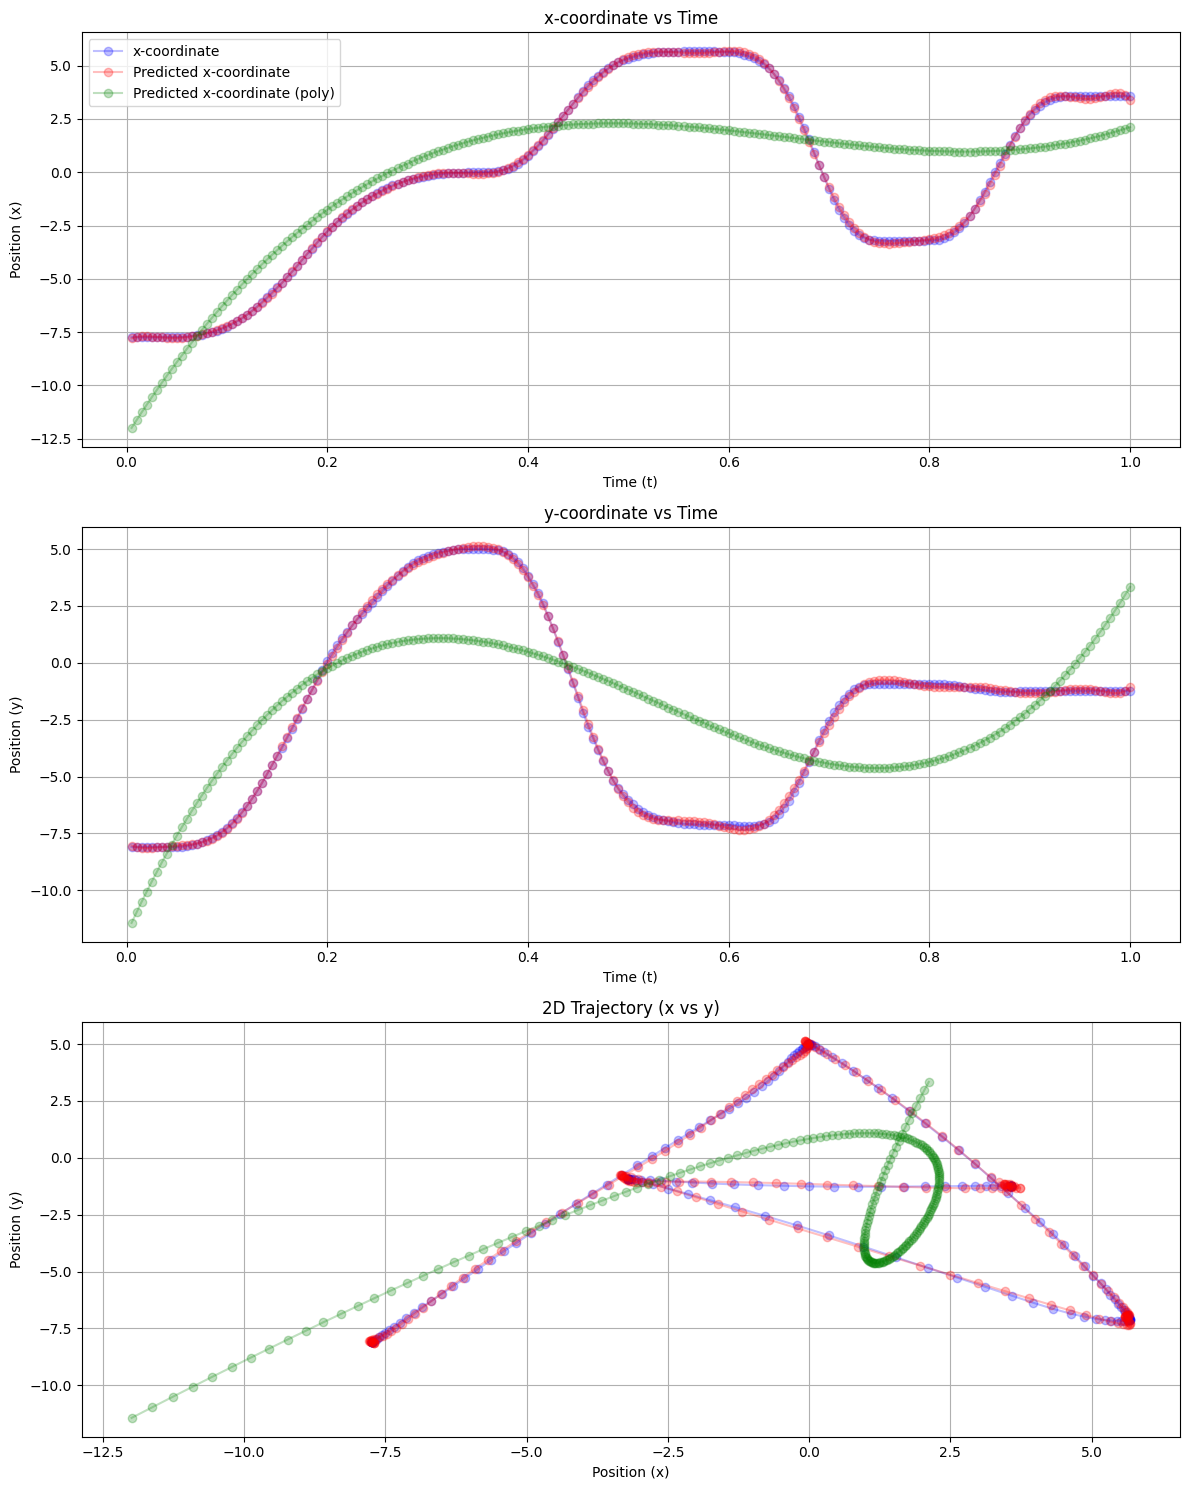

In [41]:
# Employing linear regression to fit the trajectories with polynomial basis functions
Phi_poly = polynomial_basis_function(t)
w_poly = np.linalg.pinv(Phi_poly.T @ Phi_poly) @ Phi_poly.T @ pos
predict_pos_poly = Phi_poly @ w_poly

# Plot the data (x-t) (y-t) (predicted x-t) (predicted y-t)
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
ax[0].plot(t, x, marker='o', color='blue', label='x-coordinate', alpha=0.25)
ax[0].plot(t, predict_pos_exp[:, 0], marker='o', color='red', label='Predicted x-coordinate', alpha=0.25)
ax[0].plot(t, predict_pos_poly[:, 0], marker='o', color='green', label='Predicted x-coordinate (poly)', alpha=0.25)
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Position (x)')
ax[0].set_title('x-coordinate vs Time')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t, y, marker='o', color='blue', label='y-coordinate', alpha=0.25)
ax[1].plot(t, predict_pos_exp[:, 1], marker='o', color='red', label='Predicted y-coordinate', alpha=0.25)
ax[1].plot(t, predict_pos_poly[:, 1], marker='o', color='green', label='Predicted y-coordinate (poly)', alpha=0.25)
ax[1].set_xlabel('Time (t)')
ax[1].set_ylabel('Position (y)')
ax[1].set_title('y-coordinate vs Time')
ax[1].grid(True)

ax[2].plot(x, y, marker='o', color='blue', label='Trajectory', alpha=0.25)
ax[2].plot(predict_pos_exp[:, 0], predict_pos_exp[:, 1], marker='o', color='red', label='Predicted Trajectory', alpha=0.25)
ax[2].plot(predict_pos_poly[:, 0], predict_pos_poly[:, 1], marker='o', color='green', label='Predicted Trajectory (poly)', alpha=0.25)
ax[2].set_xlabel('Position (x)')
ax[2].set_ylabel('Position (y)')
ax[2].set_title('2D Trajectory (x vs y)')
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [42]:
# Compare the performance of the two models by using Root Mean Square Error (RMSE)
def RMSE(predict, pos):
    return np.sqrt(np.mean((predict - pos) ** 2))

rmse_exp = RMSE(predict_pos_exp, pos)
rmse_poly = RMSE(predict_pos_poly, pos)
print('RMSE of exponential basis function:', rmse_exp)
print('RMSE of polynomial basis function:', rmse_poly)

RMSE of exponential basis function: 0.07941994194728892
RMSE of polynomial basis function: 2.7442829958235713


**Q1 c (8 marks)**

If you have done the previous question correctly, one set of basis functions appears to deliver much better predictions than the other set of basis functions. On closer inspection you will find that the number of basis functions used in the best predictions is much larger than for the poor predictions. We must compare like with like so modify the code so that
you can control the number of basis functions. Then plot both sets of predictions for 2, 5, 10 and 50 basis functions. Show these 2D plots and comment if you can really say that one set of basis functions outperforms the other, qualitatively.

In [43]:
# Creating a function that creates the basis function of a given degree
def polyBasisFunc(basisNum: int, t: np.ndarray) -> np.ndarray:
    t = t.reshape(-1, 1) # Reshape t to a column vector
    res = np.zeros((len(t), basisNum))
    for i in range(basisNum):
        res[:, i] = t.flatten() ** i
    return res

def fitModels(phiModel, y):
    return np.linalg.pinv(phiModel.T @ phiModel) @ phiModel.T @ y

def predictModels(phiModel, weights):
    return phiModel @ weights


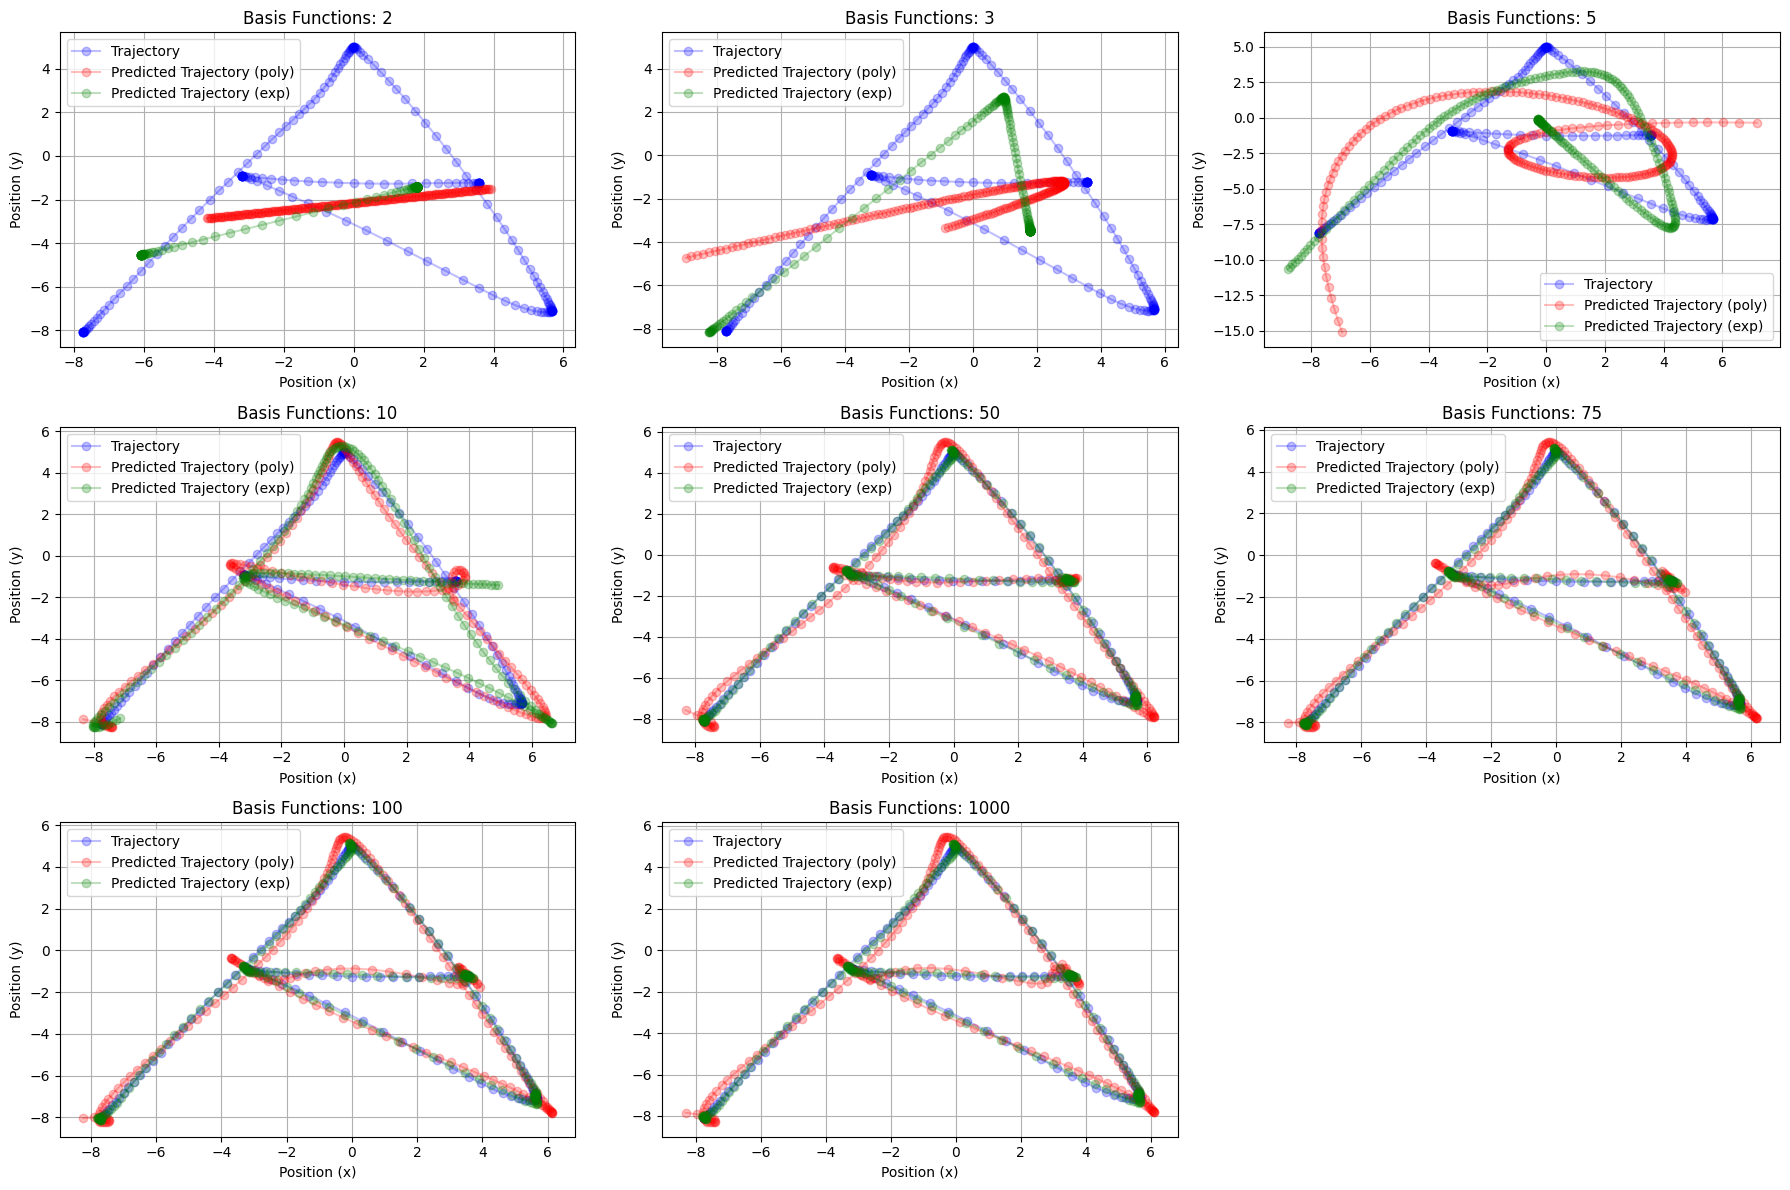

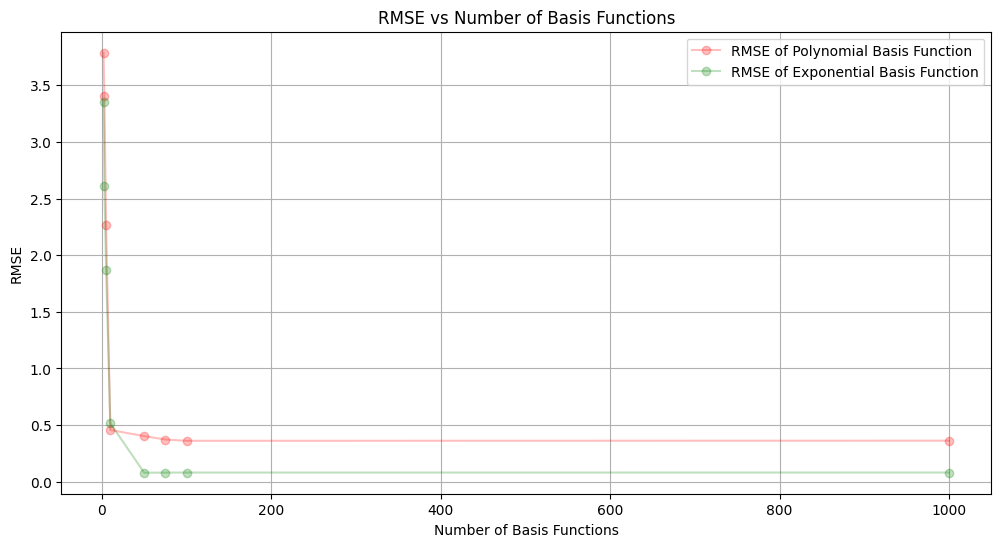

RMSE values of Polynomial and Exponential Basis Functions:

                           Polynomial  Exponential
Number of Basis Functions                         
2                            3.786908     3.349491
3                            3.407959     2.607678
5                            2.266244     1.868174
10                           0.456610     0.515603
50                           0.402843     0.079420
75                           0.372252     0.080473
100                          0.361149     0.080775
1000                         0.362230     0.081030


In [44]:
def compareBasisFunctions(basisNums: list, t: np.ndarray, pos: np.ndarray):
    plt.figure(figsize=(18, 12))

    rmse = np.zeros((len(basisNums), 2))
    
    for idx, basisNum in enumerate(basisNums):
        # Generate the basis function
        phiPoly = polyBasisFunc(basisNum, t)
        phiExp = fit_exponential(basisNum, t)
        
        # Fit the model
        wPoly = fitModels(phiPoly, pos)
        wExp = fitModels(phiExp, pos)
        
        # Predict the model
        predictPoly = predictModels(phiPoly, wPoly)
        predictExp = predictModels(phiExp, wExp)
        
        # Calculate the RMSE
        rmsePoly = RMSE(predictPoly, pos)
        rmseExp = RMSE(predictExp, pos)
        
        # Plot the data
        plt.subplot(3, 3, idx + 1)
        plt.plot(pos[:, 0], pos[:, 1], marker='o', color='blue', label='Trajectory', alpha=0.25)
        plt.plot(predictPoly[:, 0], predictPoly[:, 1], marker='o', color='red', label='Predicted Trajectory (poly)', alpha=0.25)
        plt.plot(predictExp[:, 0], predictExp[:, 1], marker='o', color='green', label='Predicted Trajectory (exp)', alpha=0.25)
        plt.title(f'Basis Functions: {basisNum}')
        plt.xlabel('Position (x)')
        plt.ylabel('Position (y)')
        plt.grid(True)
        plt.legend()

        # Store the RMSE values
        rmse[idx] = [rmsePoly, rmseExp]

    plt.tight_layout()
    plt.show()

    # Plot the RMSE values
    plt.figure(figsize=(12, 6))
    plt.plot(basisNums, rmse[:, 0], marker='o', color='red', label='RMSE of Polynomial Basis Function', alpha=0.25)
    plt.plot(basisNums, rmse[:, 1], marker='o', color='green', label='RMSE of Exponential Basis Function', alpha=0.25)
    plt.xlabel('Number of Basis Functions')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Number of Basis Functions')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Display the RMSE values as a table
    df = pd.DataFrame(rmse, index=basisNums, columns=['Polynomial', 'Exponential'])
    df.index.name = 'Number of Basis Functions'
    print('RMSE values of Polynomial and Exponential Basis Functions:\n')
    print(df)

# Compare the performance of the two models by using Root Mean Square Error (RMSE) and plot the results
basisNums = [2, 3, 5, 10, 50, 75, 100, 1000]
compareBasisFunctions(basisNums, t, pos)

### Results Interpretation
  In the previous experiment we used a set of numbers of basis functions to effectively the performance of each of the kernel. We will notice that the exponential basis function is perfoming betther than the polynomial basis function throughout the process of adding new basis function.

At the first glance,the RMSE of the polynomial basis function had less RMSE than the exponential, which contradicts what I have stated, for example when basisNum is 75. The key observation is that RMSE alone does not capture the ability of the function to handle oscillations effectively. Its true that the RMSE value of the polynomial is much less than the exponential kernel. However, if we refered to the graphs ploted above, which shows the trajectory of the objects, we will notice that the polynomial function introduced randomness which really does not dipict the actual path, this noise is due to overfitting.

 Polynomials basis function performs well when the number of the basis functions are moderate (between 10, 25) since they stuggles when dealing with localized oscillations in the dataset. The mathematical inutition for this observation is that polynomials are a global function which means that the higher degress term in the polynomial affects the entire performance of the model leading to overfitting. 

 In contrast, exponentiual function through they converges slowly, but excels if there is some sort of oscillatory beahavior due to their localized nature that allows them to capture  sharp variations without introducing an considering the global artificats, which illustrates its robustness across varying dataset complexities.

**Q1 d (5 marks)**

Consider what basis functions (beyond exponential or the polynomial basis functions) might be suitable to model the data "data2.npy". In "data2.npy", the first column is time t while the second column is x-coordinate. You should be able to do this with a small set of basis functions and get a good fit. 

Plot your prediction and the original data in the same figure (i.e., t-x).

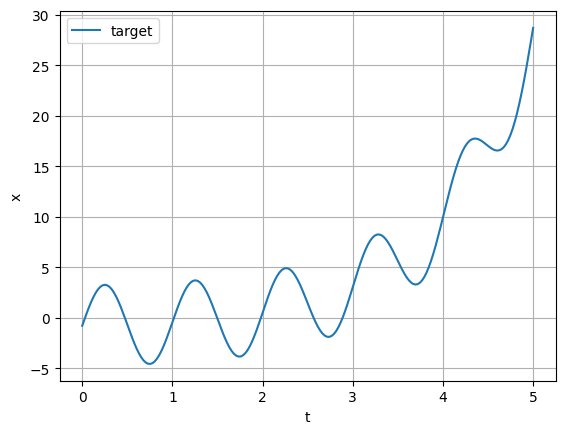

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#  plot the trajectory
data = np.load("data2.npy") # size: 200*2, the first column is time input while the second column is x-coordinate.
t = data[:, 0]
target = data[:, 1]

plt.plot(t, target, label='target')
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

First of all we need to observe the graph above so that we can come up with a hypothesis and test whether our assumptions holds and leads us to a result. Firstly we observe that there is a oscillatory behavior on the graph which is showing clearly that there is some sort of trignomoetric functions involved in the basis function. The second think we notice is that the growth has some sort of an exponential behavior. So with a quick google search and using a bit of AI for reasoning with Wikipedia. I came across a basis function called the Fourier Basis Function. In simple words its a basis function that contains trignometry and some sort of addition of frequency to model a complex periodic nonlinear graphs, and the way that it works is by combining oscillation into a such pattern in a linear manner. The math block below will explain it further 

$$ f(t) = \alpha*sin (t) + \beta*cos(t) $$  
This is an example of a simple basis function. I will denote this as a single relative to this project as a trig-unit : A unit which containes an sine and a cosine under the same index. We will notice that alpha and beta impacts on the amplitude of the function. Now since we have the basics lets expand futher. 
$$ f(t) = \alpha_{1}sin(t) + \beta_{1}cos(t) + \alpha_{2}sin(2t) + \beta_{2}cos(2t) \dots + \alpha_{n}sin(nt) + \beta_{n}cos(nt) $$ 
So we notice that there is a pattern this is one of the fourier series , we could further simplify it into a summation 
$$ f(t) \sum ^{N}_{k=1}(a_{k}sin(kt)+ b_{k}cos(kt))$$ 
Where k is the index of frequency (number of waves per second), a and b are the wieght coefficents and  t is the input variable time. 


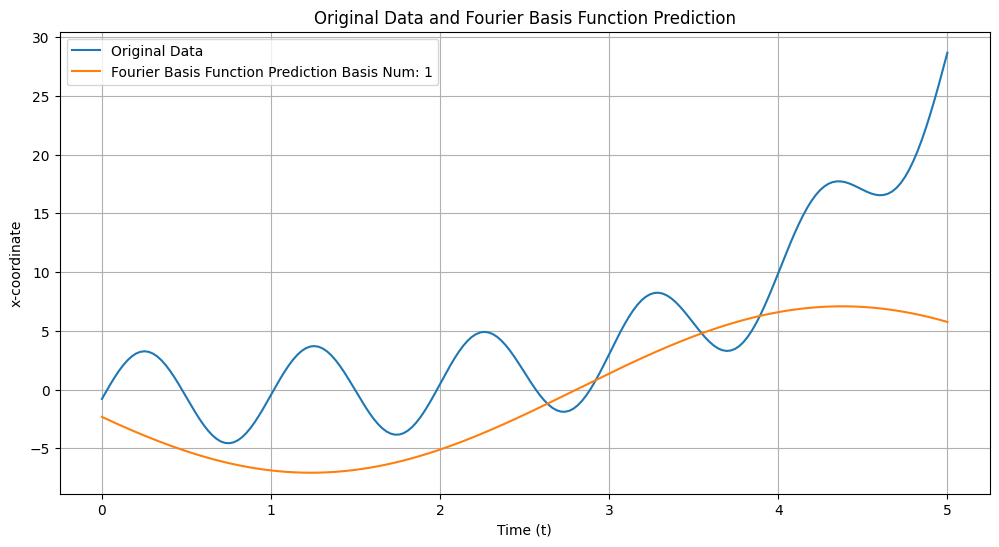

In [46]:
# Defined the fourier basis function
def fourier_basis_function(t, basis_num):
    t = t.reshape(-1, 1)  # Ensure t is a column vector
    res = np.zeros((len(t), 2 * basis_num))  # Create a matrix to store basis functions
    for i in range(basis_num):
        res[:, 2 * i] = np.sin((i + 1) * t.flatten())  # Sine term
        res[:, 2 * i + 1] = np.cos((i + 1) * t.flatten())  # Cosine term
    return res

# Plot the fourier basis functions on the original plot
basis_num = 1
phi = fourier_basis_function(t, basis_num)

# Fit the model using Fourier basis functions
w_fourier = np.linalg.pinv(phi.T @ phi) @ phi.T @ target
predict_target_fourier = phi @ w_fourier

# Plot the original data and the Fourier basis function predictions
plt.figure(figsize=(12, 6))
plt.plot(t, target, label='Original Data')
plt.plot(t, predict_target_fourier, label=f'Fourier Basis Function Prediction Basis Num: {basis_num}')
plt.xlabel('Time (t)')
plt.ylabel('x-coordinate')
plt.title('Original Data and Fourier Basis Function Prediction')
plt.grid(True)
plt.legend()
plt.show()


Now we have established the basis function for this problem. Therefore in order to find an optimal number of basis function then we need to convert the following problem into an optimization proble. Considering that we have a basis function, and a loss function. Then we need to find the optimal number of basis functions such that it minimizes the loss function. Now what we ended with the basis function which looks like this

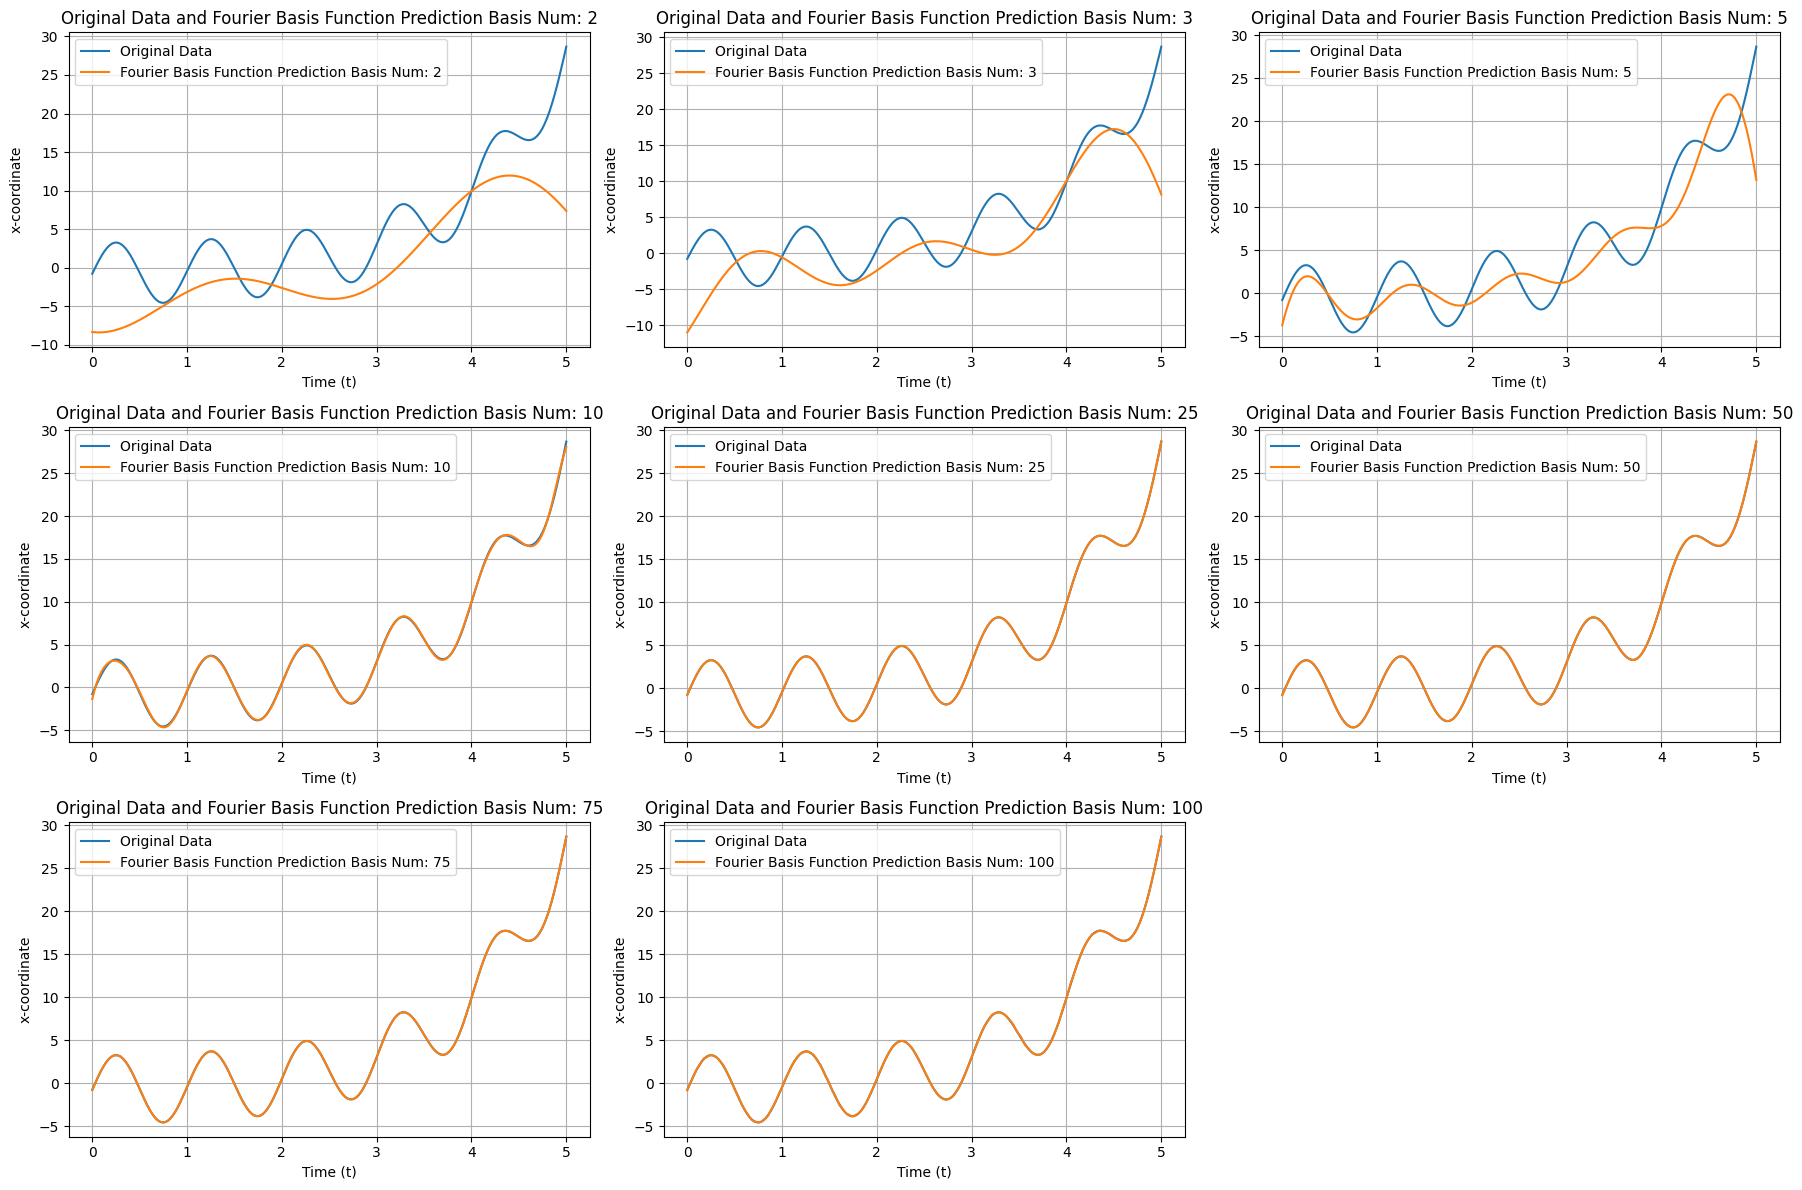

In [47]:
def fitFourier(basisNums,t):
    plt.figure(figsize=(18, 12))
    # Calculate the Root Mean Square Error for each basis function
    rmse = np.zeros((len(basisNums), 1))

    for idx, basisNum in enumerate(basisNums):
        # Generate the basis function
        phi = fourier_basis_function(t, basisNum)
        # Fit the model
        w = np.linalg.pinv(phi.T @ phi) @ phi.T @ target
        # Predict the model
        predict_target = phi @ w
        # Calculate the RMSE
        rmse[idx] = RMSE(predict_target, target)
        plt.subplot(3, 3, idx + 1)
        plt.plot(t, target, label='Original Data')
        plt.plot(t, predict_target, label=f'Fourier Basis Function Prediction Basis Num: {basisNum}')
        plt.xlabel('Time (t)')
        plt.ylabel('x-coordinate')
        plt.title(f'Original Data and Fourier Basis Function Prediction Basis Num: {basisNum}')
        plt.grid(True)
        plt.legend()
    plt.tight_layout()
    plt.show()
    return rmse

basisNums = [2, 3, 5, 10, 25, 50, 75, 100]
rootMean = fitFourier(basisNums, t)


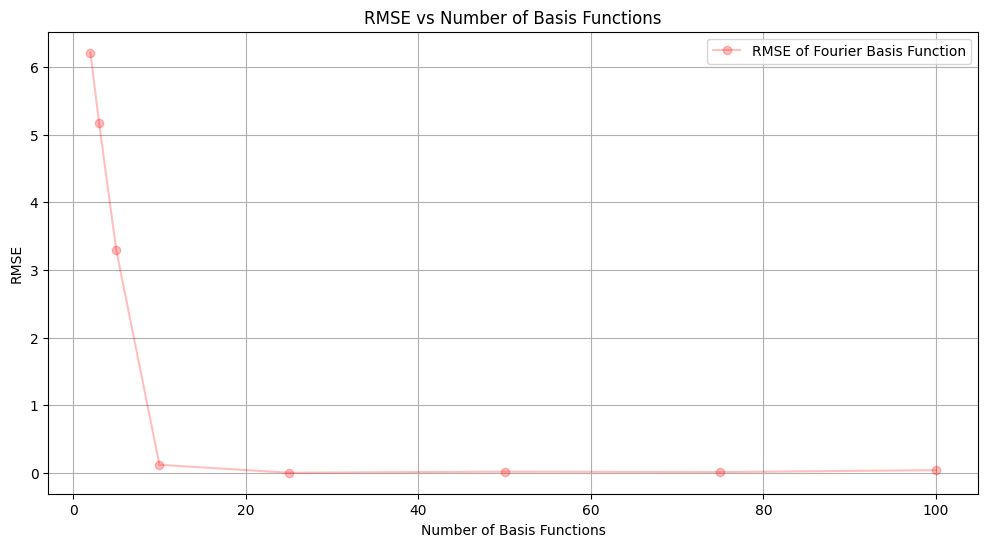

RMSE values of Fourier Basis Functions:

                            Fourier
Number of Basis Functions          
2                          6.211999
3                          5.177498
5                          3.289317
10                         0.117592
25                         0.000011
50                         0.016113
75                         0.009977
100                        0.037732


In [48]:
#Plot the RMSE values of Fourier Basis Functions
plt.figure(figsize=(12, 6))
plt.plot(basisNums, rootMean, marker='o', color='red', label='RMSE of Fourier Basis Function', alpha=0.25)
plt.xlabel('Number of Basis Functions')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Basis Functions')
plt.grid(True)
plt.legend()
plt.show()

# Display the RMSE values of Fourier Basis Functions
print('RMSE values of Fourier Basis Functions:\n')
df = pd.DataFrame(rootMean, index=basisNums, columns=['Fourier'])
df.index.name = 'Number of Basis Functions'
print(df)



Based on the graphs and the function model we can observe that the model was able to accurately capture the behavior of the plot. And that the model almost achieve the optimal result when its around 25 basis functions are used. 

# Question 2

**Q2 a (4 marks)**

You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array, where each column corresponds to one sample. The data format in each column is: [x_1, y_1, z_1, x_2, y_2, z_2, ………, x_N, y_N, z_N], where (x_i, y_i, z_i) corresponds to the i-th 3D point of a blood vessel. By plotting all 3D points in one column, you can obtain the shape of a blood vessel of that sample.

Plot seven figures to show the 3D blood vessel shape for each sample separately. Also plot two arbitrary shapes on top of each other to get a feeling of how similar or dissimilar the shapes are.

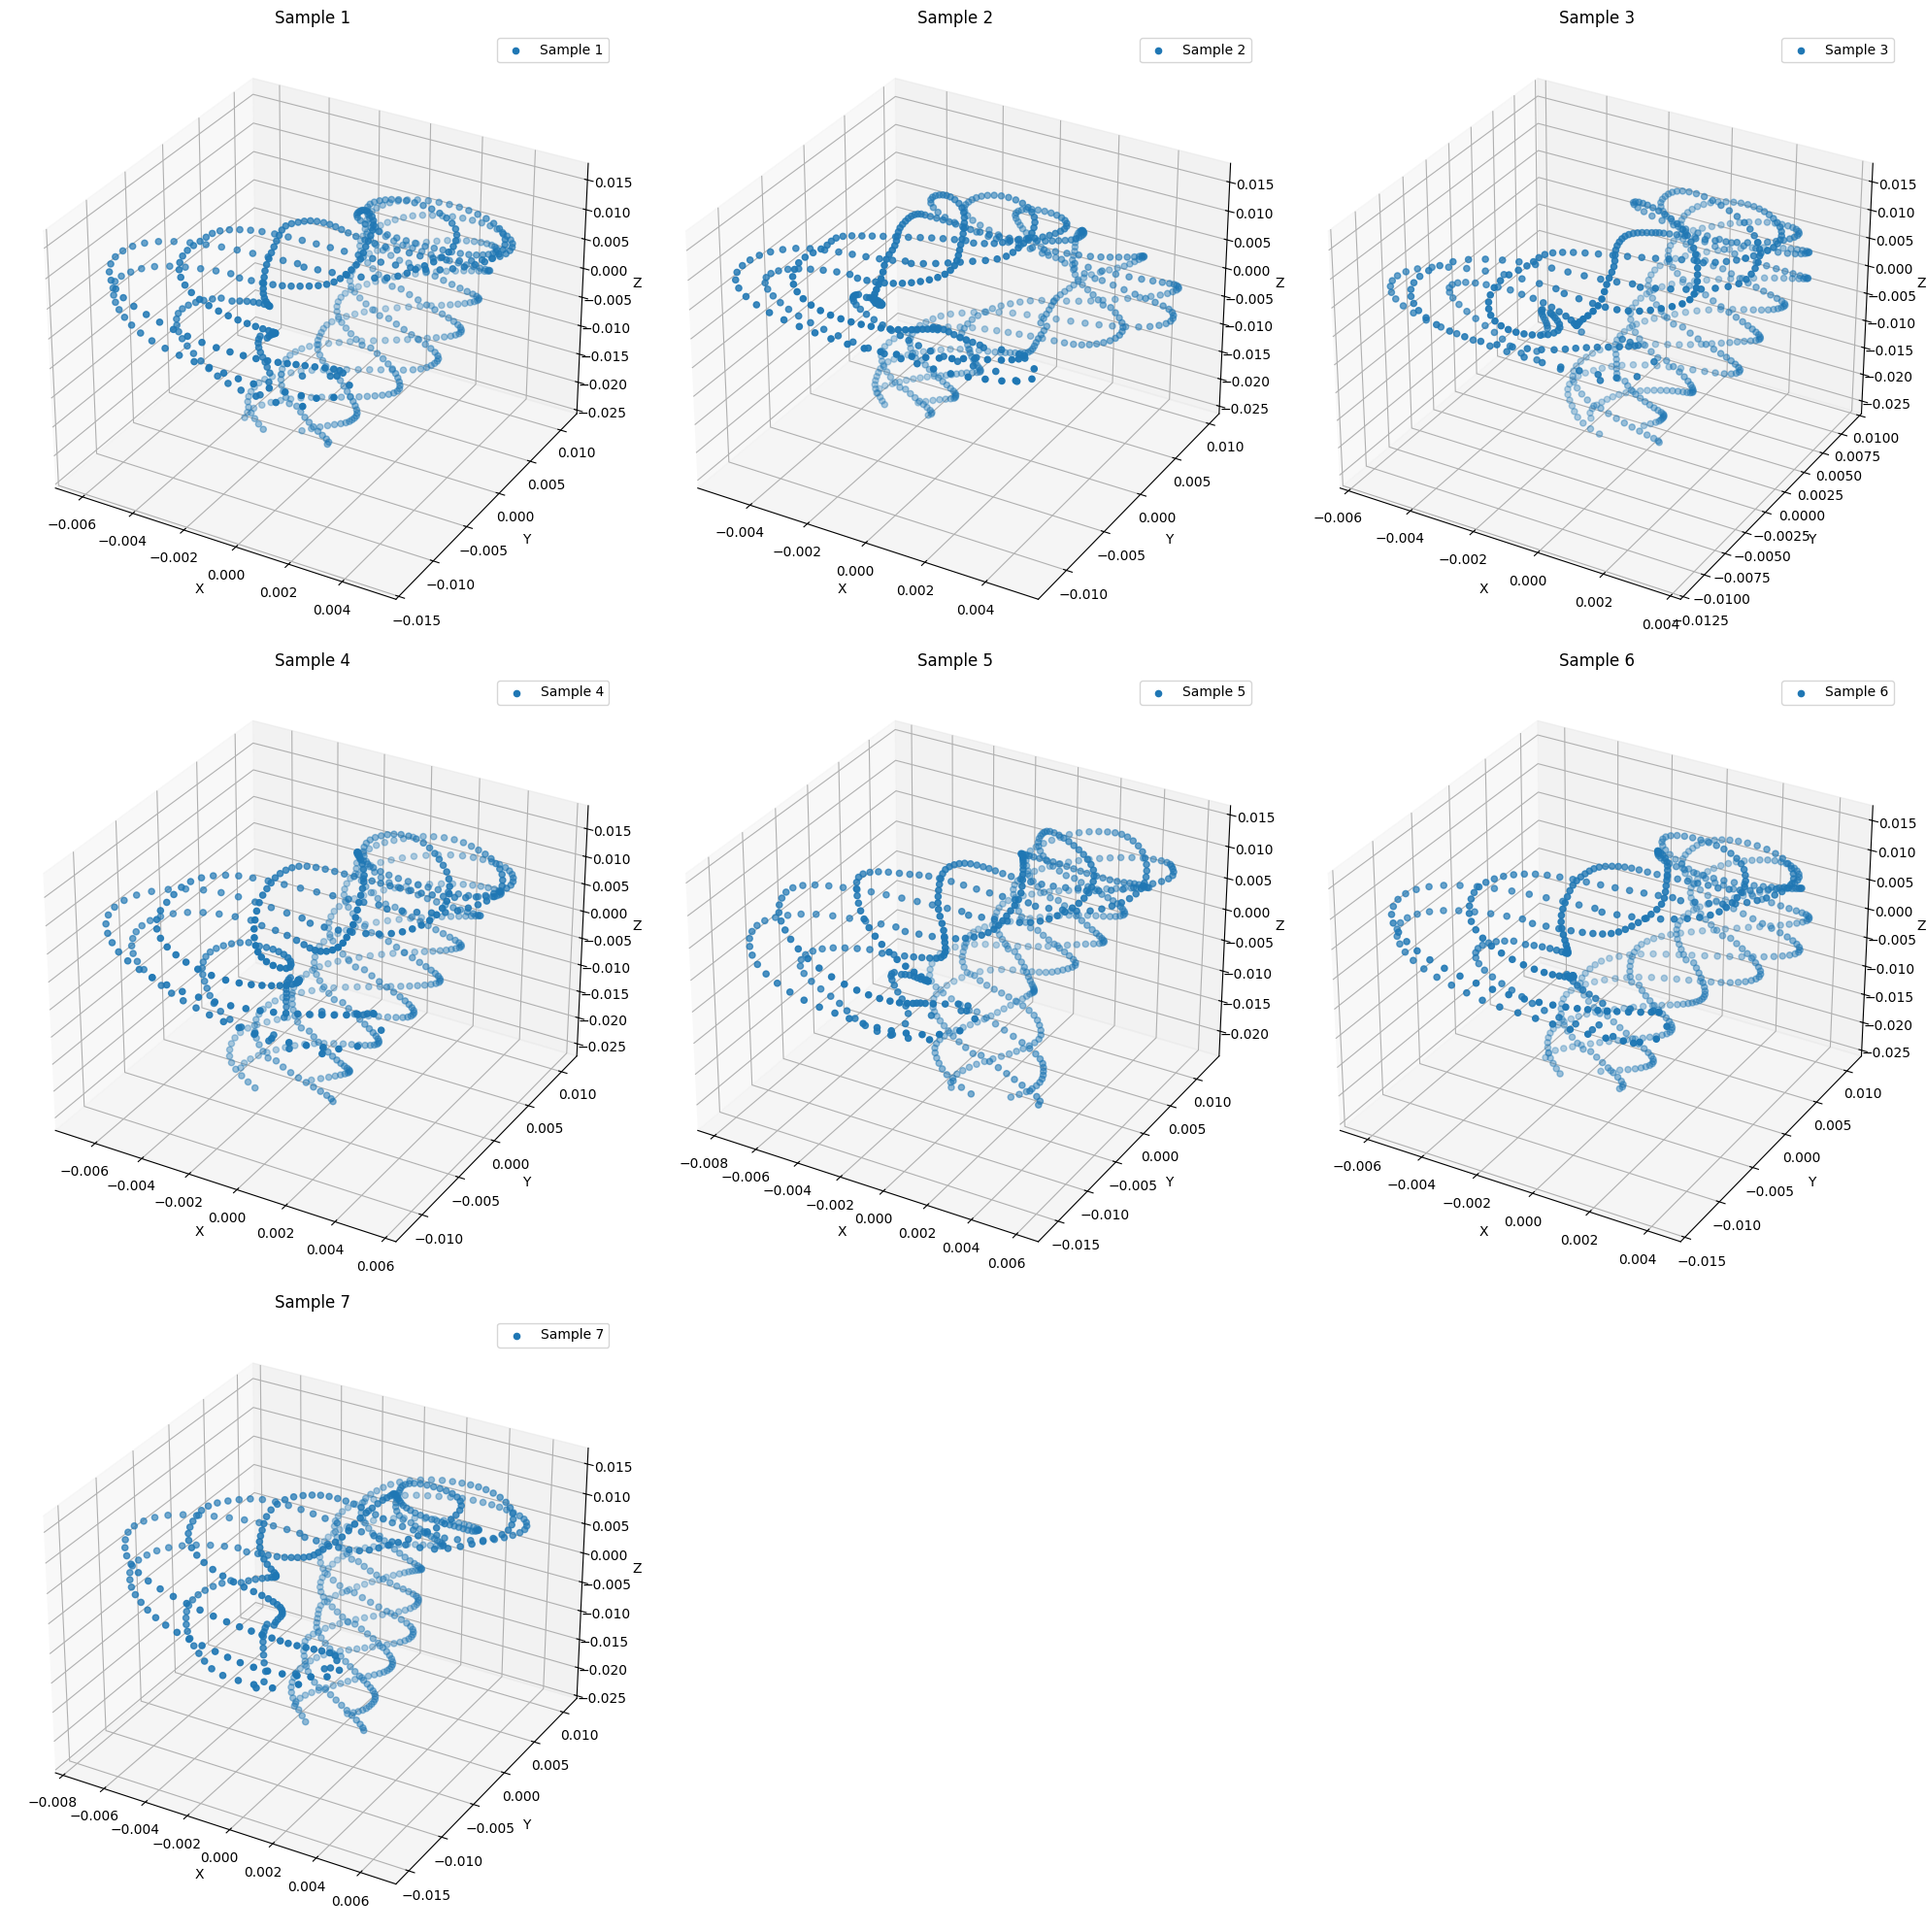

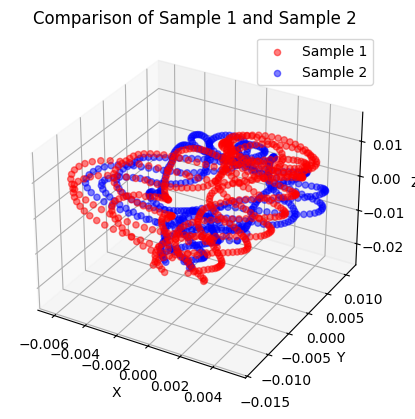

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
shape_array = np.load('shape_array.npy')

# Number of samples
num_samples = shape_array.shape[1]

# Plot the 3D blood vessel shape for each sample separately
fig = plt.figure(figsize=(20, 20))
for i in range(num_samples):
    ax = fig.add_subplot(3, 3, i + 1, projection='3d')
    sample = shape_array[:, i]
    x, y, z = sample[0::3], sample[1::3], sample[2::3]
    ax.scatter(x, y, z, label=f'Sample {i + 1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Sample {i + 1}')
    ax.legend()

plt.tight_layout()
plt.show()

# Choose two random samples to compare their similarity 

# Plot two arbitrary shapes on top of each other to compare their similarity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sample1 = shape_array[:, 0]
sample2 = shape_array[:, 1]
x1, y1, z1 = sample1[0::3], sample1[1::3], sample1[2::3]
x2, y2, z2 = sample2[0::3], sample2[1::3], sample2[2::3]
ax.scatter(x1, y1, z1, label='Sample 1', alpha=0.5, color='red')
ax.scatter(x2, y2, z2, label='Sample 2', alpha=0.5, color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Comparison of Sample 1 and Sample 2')
plt.legend()
plt.show()

**Q2 b (10 marks)** 

Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Finally, project original data onto lower-dimensional space and reconstruct data.

Proceed as follows:

1. Subtract the mean from the data, so that it is centered around the origin.

2. Estimate the covariance matrix from the centred data.

3. Calculate eigenvectors and eigenvalues using numpy functions

4. Project centered data (1845 dimension) into a lower-dimension space (You need to choose a reasonable dimension). 

5. Reconstruct the blood vessel shape from the lower dimension data in step 4.


As a sanity check plot a blood vessel shape reconstructed from the eigenvectors on top of the original blood vessel shape. Explain how much data reduction you have achieved. Comment on your results.

The mean values  is [ 0.00193598 -0.00763957 -0.00092062 ...  0.00069149 -0.00245062
 -0.02235135] with shape (1845,)
The centered data is [[-7.4758893e-05  1.1881958e-03 -1.5242831e-03 ... -7.2688295e-04
   3.6488986e-04  4.1148486e-04]
 [-1.4068587e-03  1.4783959e-03  3.0308613e-03 ... -2.3050755e-03
  -3.0800793e-04 -2.8335806e-03]
 [-2.2647216e-04  2.8674894e-03  7.6742750e-04 ... -7.8169454e-04
   7.2224683e-04 -1.5874696e-03]
 ...
 [-5.2719354e-04 -2.1733197e-03 -1.3619580e-04 ...  2.5318917e-03
  -8.2525064e-04  1.0413480e-03]
 [-6.4024120e-04  2.0622027e-03  1.7977811e-03 ... -1.7871442e-03
  -3.4645502e-04 -8.0838334e-05]
 [ 7.2636455e-04 -7.2009303e-04 -1.6911328e-03 ...  2.6638750e-03
  -3.9904937e-04  3.3359230e-04]] with shape (1845, 7)


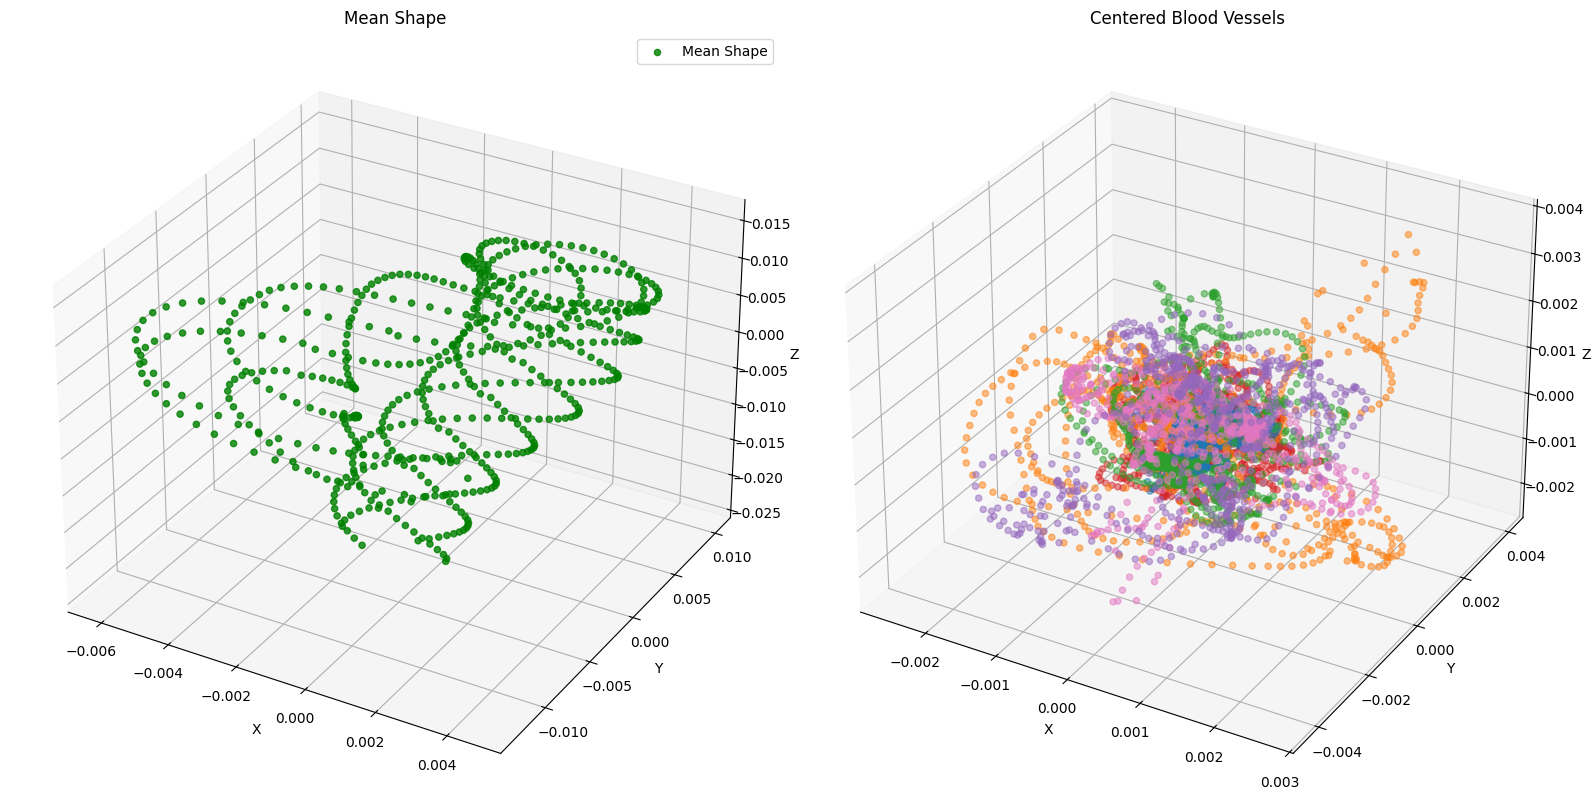

In [50]:
meanData = np.mean(shape_array, axis=1)
print(f"The mean values  is {meanData} with shape {meanData.shape}")
centeredData = shape_array - meanData[:, np.newaxis]
print(f"The centered data is {centeredData} with shape {centeredData.shape}")

# Adjust to use only 3D-compatible features
mean_x, mean_y, mean_z = meanData[0::3], meanData[1::3], meanData[2::3]
centered_x, centered_y, centered_z = centeredData[:, 0], centeredData[:, 1], centeredData[:, 2]

# Plotting
fig = plt.figure(figsize=(16, 8))

# Subplot 1: Mean shape
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(mean_x, mean_y, mean_z, c='green', label="Mean Shape", alpha=0.8)
ax1.set_title("Mean Shape")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# Subplot 2: Centered data
ax2 = fig.add_subplot(122, projection='3d')
for i in range(centeredData.shape[1]):
    sample = centeredData[:, i]
    x, y, z = sample[0::3], sample[1::3], sample[2::3]
    ax2.scatter(x, y, z, alpha=0.5, label=f"Sample {i+1}" if i < 1 else None)  # Label only the first sample
    

ax2.set_title("Centered Blood Vessels")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

The covariance matrix with shape (7, 7)


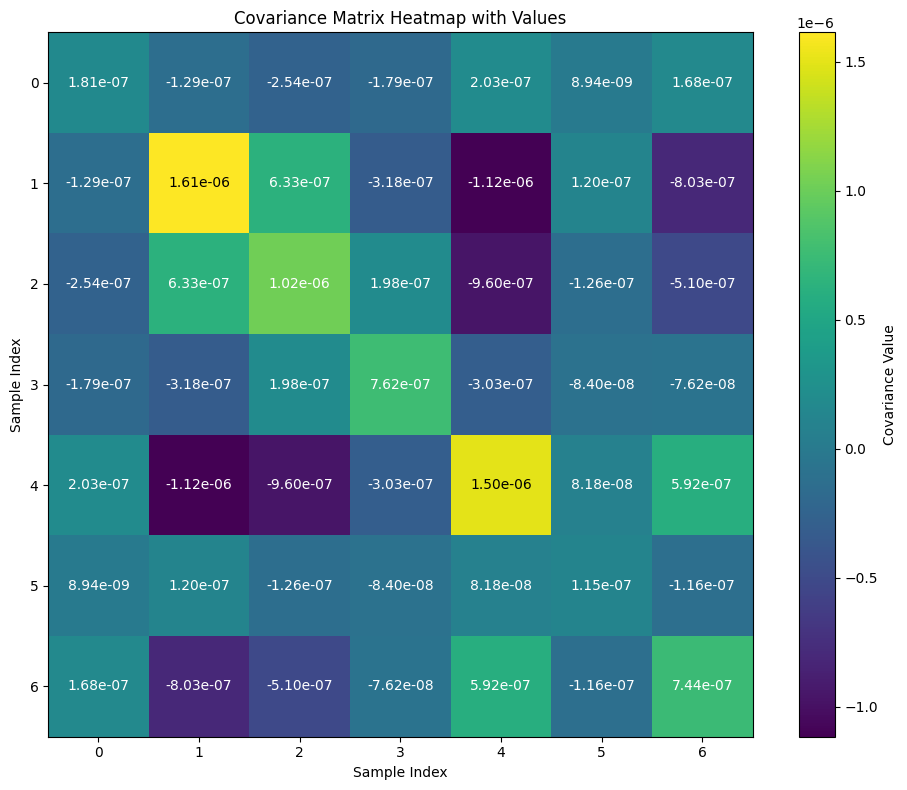

In [51]:
coVar = np.cov(centeredData.T)
print(f"The covariance matrix with shape {coVar.shape}")

# Plot the covariance matrix
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(coVar, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar(label="Covariance Value")

# Add values to the heatmap
for i in range(coVar.shape[0]):
    for j in range(coVar.shape[1]):
        plt.text(j, i, f"{coVar[i, j]:.2e}", ha="center", va="center", color="white" if heatmap.cmap(heatmap.norm(coVar[i, j]))[:3] < (0.5, 0.5, 0.5) else "black")

# Titles and labels
plt.title("Covariance Matrix Heatmap with Values")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()

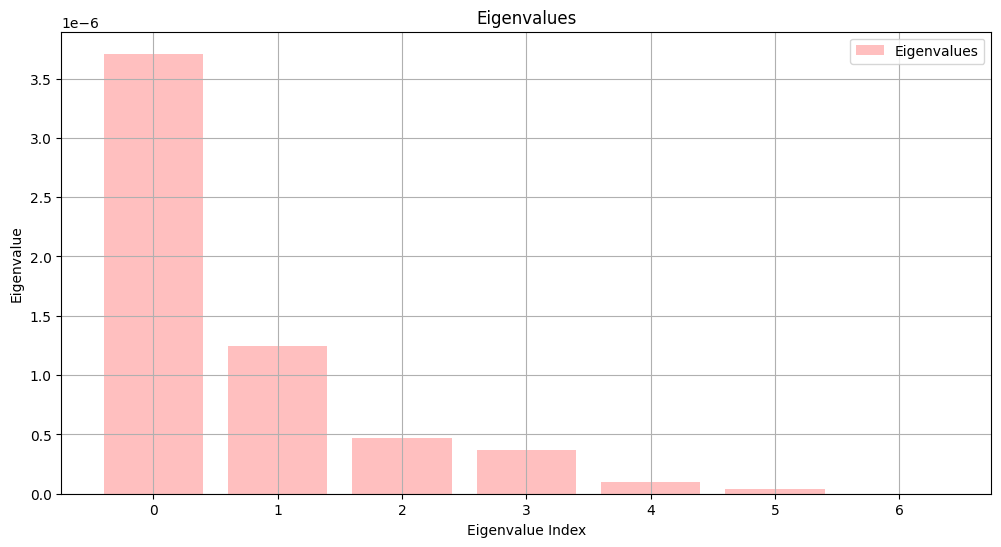

In [52]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix 
eigenvalues, eigenvectors = np.linalg.eig(coVar)
# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Display the eigenvalues
plt.figure(figsize=(12, 6))
plt.bar(x=range(len(eigenvalues)), height=eigenvalues[sorted_indices], color='red', label='Eigenvalues', alpha=0.25)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues')
plt.grid(True)
plt.legend()
plt.show()


Based on the bar chart we may observe that the eigen-values of the first 3 indexes has the largest variances. So we will consider them as the principal components in which PCA will take place. 

Eigenvalues, Variance Ratio, and Cumulative Variance Ratio:

                    Eigenvalue  Variance Ratio  Cumulative Variance Ratio
Eigenvalue Index                                                         
0                 3.708988e-06    6.249123e-01                   0.624912
1                 1.247172e-06    2.101310e-01                   0.835043
2                 4.683007e-07    7.890207e-02                   0.913945
3                 3.723490e-07    6.273555e-02                   0.976681
4                 1.015287e-07    1.710616e-02                   0.993787
5                 9.256887e-19    1.559655e-13                   0.993787
6                 3.687537e-08    6.212981e-03                   1.000000
The centered eigenvectors shape is (1845, 7)


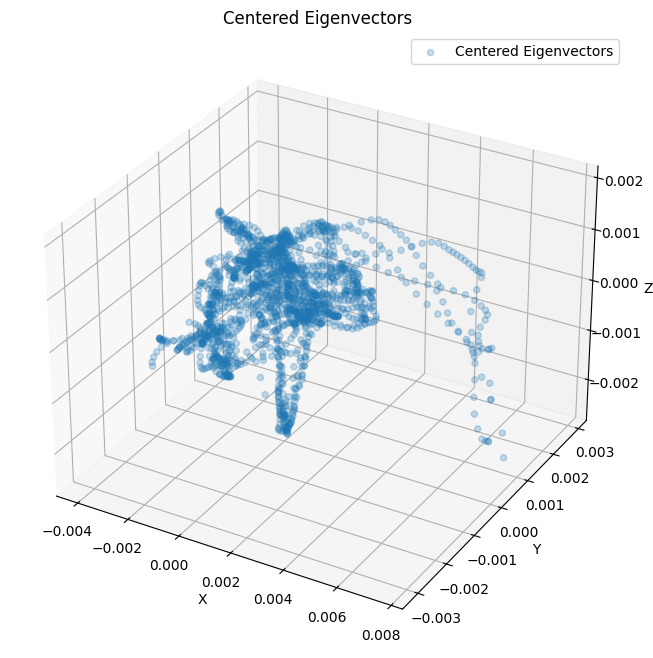

In [53]:
varRatio = eigenvalues / np.sum(eigenvalues)
cumulativeVarRatio = np.cumsum(varRatio)
# Display the variance ratio and cumulative variance ratio as pandas
df = pd.DataFrame({'Eigenvalue': eigenvalues, 'Variance Ratio': varRatio, 'Cumulative Variance Ratio': cumulativeVarRatio})
df.index.name = 'Eigenvalue Index'

print('Eigenvalues, Variance Ratio, and Cumulative Variance Ratio:\n')
print(df)

# Take the first three eigenvectors
centeredEigBase = eigenvectors.T.dot(centeredData.T).T
print(f"The centered eigenvectors shape is {centeredEigBase.shape}")

# Plot the centeredFigBased Figure
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centeredEigBase[:, 0], centeredEigBase[:, 1], centeredEigBase[:, 2], alpha=0.25
           , label='Centered Eigenvectors')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Centered Eigenvectors')
plt.legend()
plt.show()


The projected data shape is (1845, 3)
The projected data shape is (1845, 7) and the first 2 rows are [[ 0.00034286 -0.00067883 -0.00024749  0.          0.          0.
   0.        ]
 [ 0.00475143  0.00247943 -0.00157082  0.          0.          0.
   0.        ]]
The reconstructed data shape is (1845, 7)
 The shape of the eigen vectors is (7, 7)


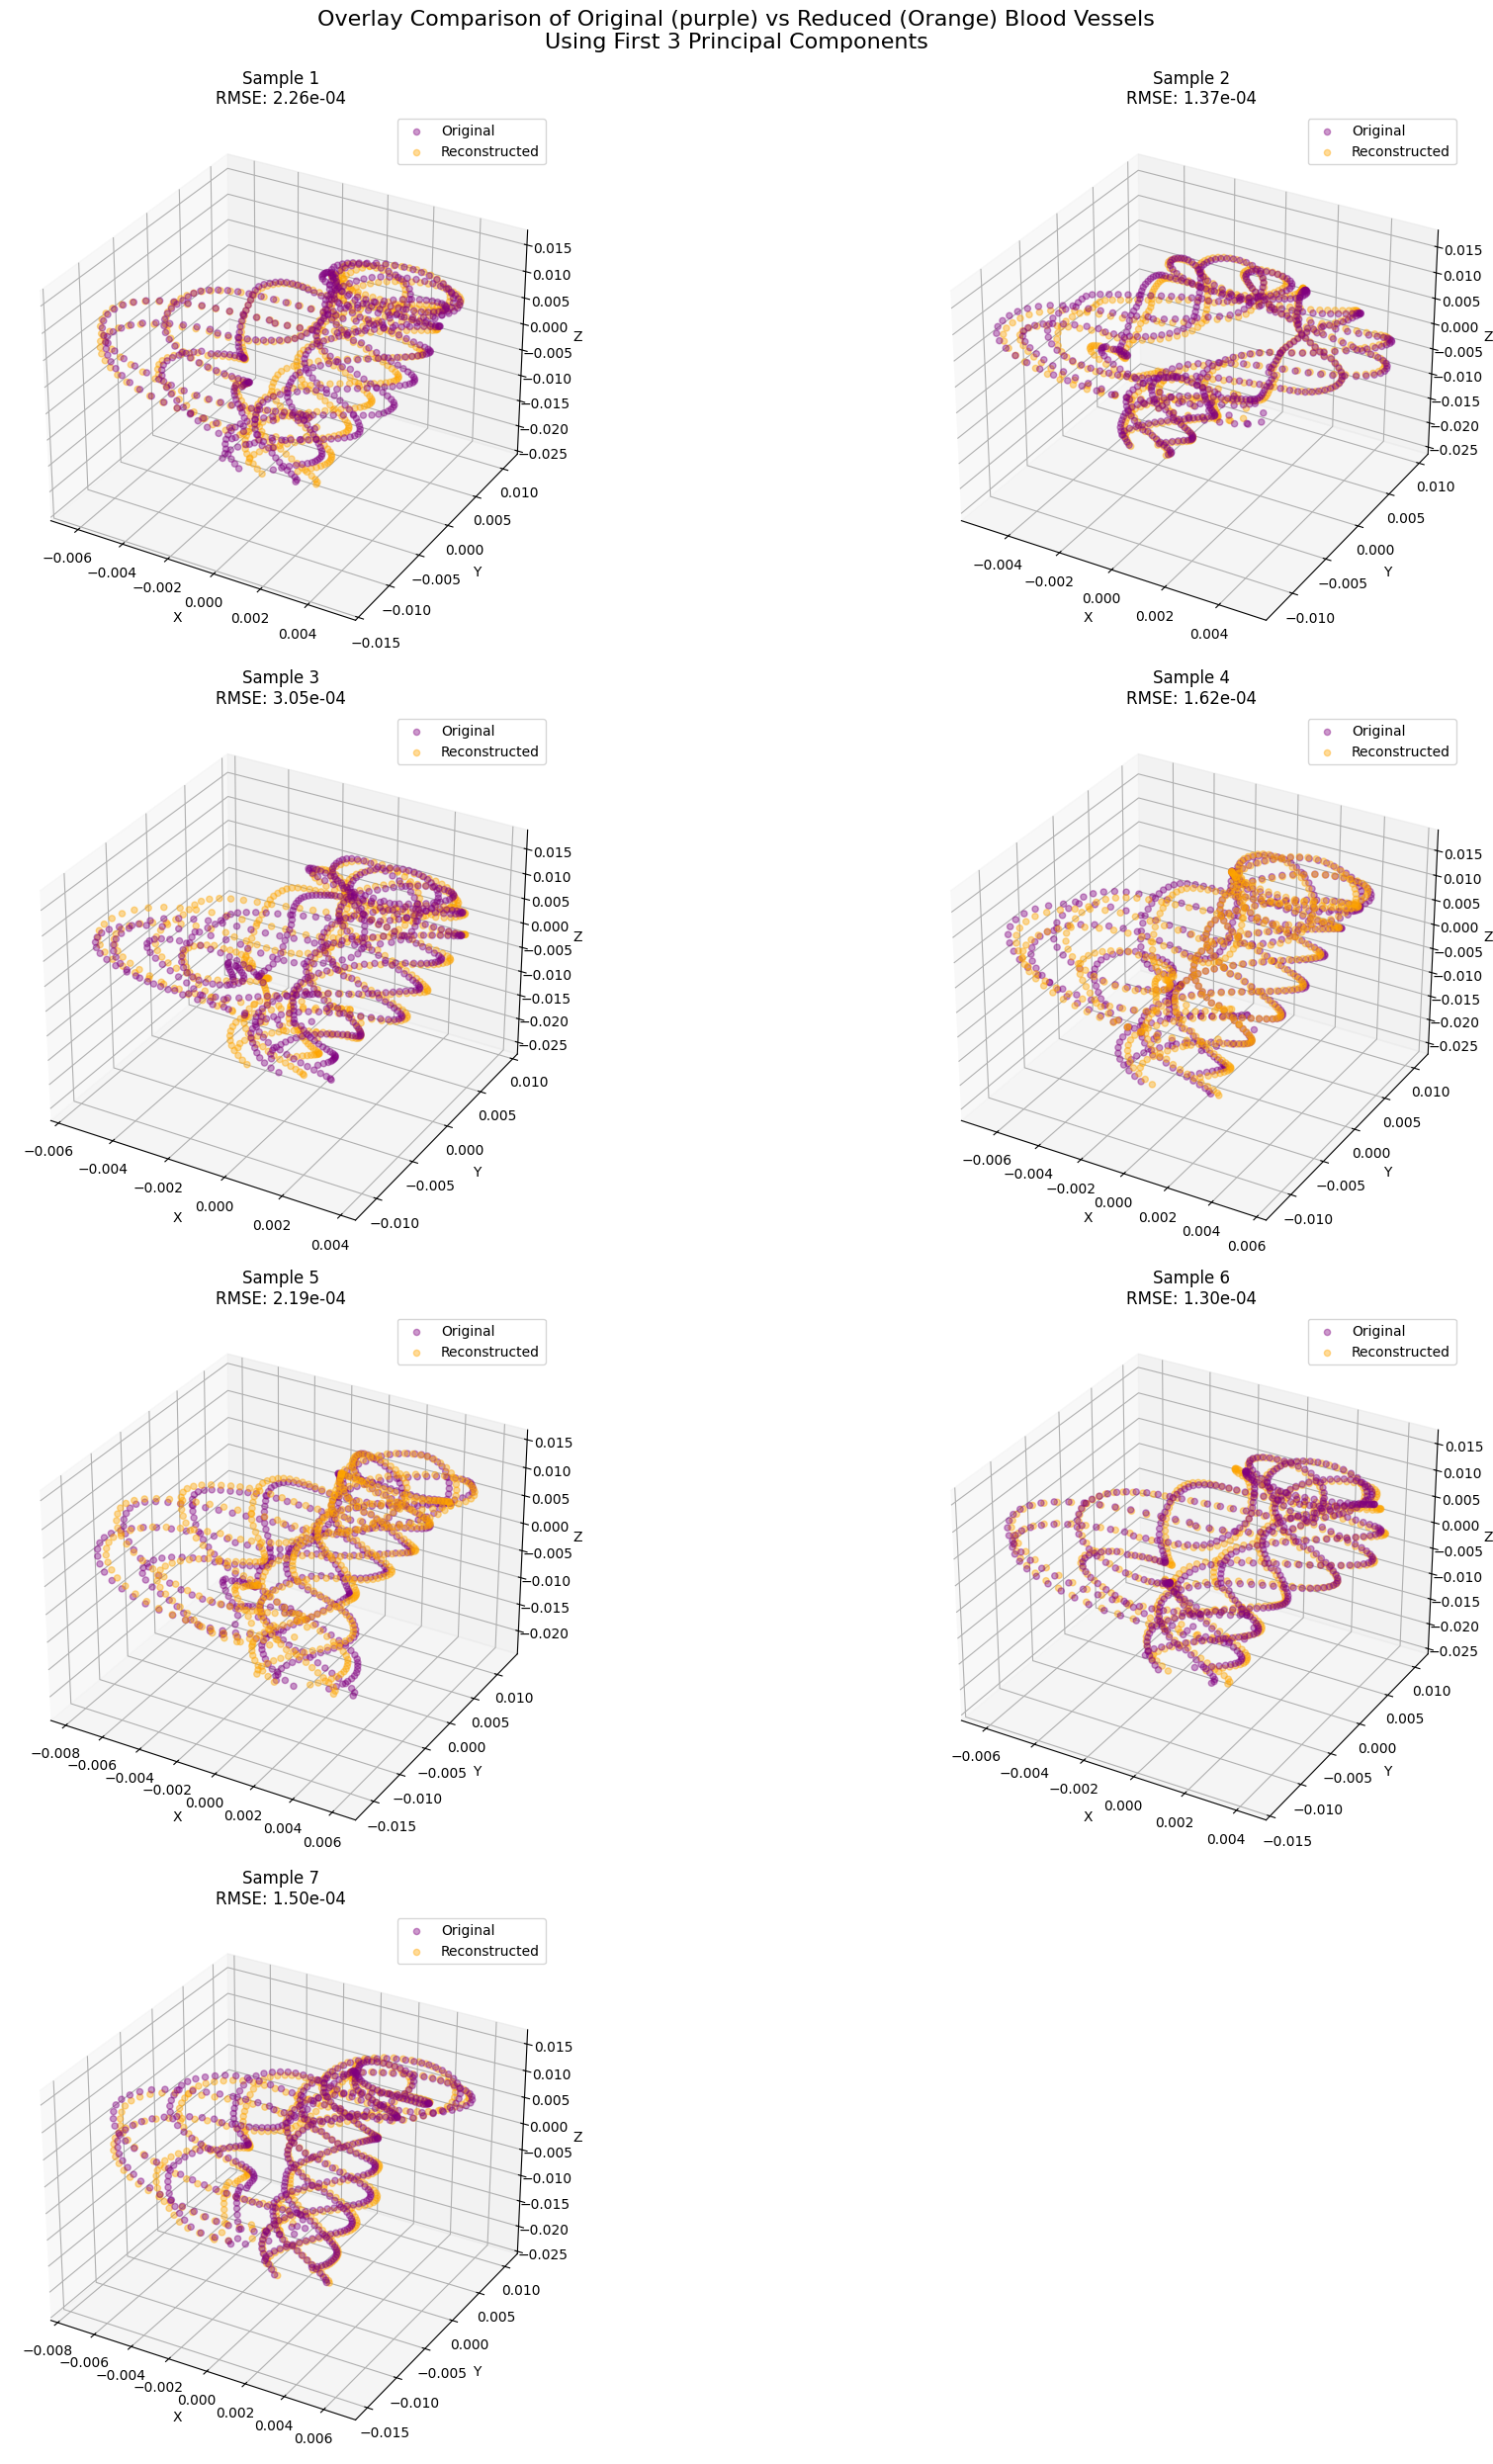

In [54]:
# Reduce the dimensionality of the data by projecting it onto the first three eigenvectors
projectedData = centeredEigBase[:,:3]
print(f"The projected data shape is {projectedData.shape}")

# Adding zeros to the removed dimensions as paddings
projectedData = np.hstack((projectedData, np.zeros((projectedData.shape[0], centeredData.shape[1] - 3))))
print(f"The projected data shape is {projectedData.shape} and the first 2 rows are {projectedData[:2]}")

# Reconstruct the data by projecting it back to the original space
reconstructedData = eigenvectors.dot(projectedData.T).T + meanData[:, np.newaxis]

print(f"The reconstructed data shape is {reconstructedData.shape}")
print(f" The shape of the eigen vectors is {eigenvectors.shape}")

# Create a figure with 7 subplots (one for each sample)
fig = plt.figure(figsize=(20, 25))

# Define colors for better visibility of differences

# Loop through each sample to create its overlay plot
for sample_idx in range(shape_array.shape[1]):
    # Get the current sample from both original and reconstructed data
    original_sample = shape_array[:, sample_idx]
    reconstructed_sample = reconstructedData[:, sample_idx]
    
    # Extract x, y, z coordinates for both versions
    x_orig, y_orig, z_orig = original_sample[0::3], original_sample[1::3], original_sample[2::3]
    x_recon, y_recon, z_recon = reconstructed_sample[0::3], reconstructed_sample[1::3], reconstructed_sample[2::3]
    
    # Create subplot for this sample
    ax = fig.add_subplot(4, 2, sample_idx + 1, projection='3d')
    
    # Plot both original and reconstructed versions with different colors and transparency
    ax.scatter(x_orig, y_orig, z_orig, c='purple', alpha=0.4, label='Original')
    ax.scatter(x_recon, y_recon, z_recon, c='orange', alpha=0.4, label='Reconstructed')
    
    # Calculate reconstruction error for this sample
    mse = np.mean(abs(original_sample - reconstructed_sample))
    # rmse = np.sqrt(mse)
    
    # Add title and labels
    ax.set_title(f'Sample {sample_idx + 1}\nRMSE: {mse:.2e}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

plt.suptitle('Overlay Comparison of Original (purple) vs Reduced (Orange) Blood Vessels\nUsing First 3 Principal Components', 
             fontsize=16, y=0.995)
plt.tight_layout()
plt.show()


In [55]:
# Calculate the analytics and statisitcs of PCA operation
# Amount of the reduction in the data
origDim = shape_array.shape
reducedDim = projectedData.shape

originalPoint = np.prod(origDim)
reconstPoints = 3 * shape_array.shape[0]

print(f"The original point is {originalPoint}")
print(f"The reconstructed point is {reconstPoints}")
print(f"The reduction in the data is {1 - reconstPoints / originalPoint}")

# Calculate the RMSE of the reconstruction and the original
mse = np.mean((shape_array - reconstructedData) ** 2)
rmse = np.sqrt(mse)
print(f"The RMSE of the reconstruction is {rmse :.2e}")

# Dice Similarity Coefficient
def diceSimilarityCoefficient(original, reconstructed):
    intersection = np.sum(original * reconstructed)
    union = np.sum(original) + np.sum(reconstructed)
    return 2 * intersection / union

# Calculate the Dice Similarity Coefficient
dice = diceSimilarityCoefficient(shape_array, reconstructedData)
print(f"The Dice Similarity Coefficient is {dice}")




The original point is 12915
The reconstructed point is 5535
The reduction in the data is 0.5714285714285714
The RMSE of the reconstruction is 2.70e-04
The Dice Similarity Coefficient is 11.519197923934009


### Process of Thoughts
We can simply generalize the performance of the manual principal component analysis on a dataset with a fixed number of components: 3. The dataset contains 1845 points and 7 features. I planned to reduce the feature rather than the point since its much more computationally efficent when it comes computing the covariance matrix and the eigen-vectors since the resultant is (7,7) sqaure matrix. Assuming that the eigenvectors and eigenvalues are rearranged in a descending order. The choice that I made in the trial is based on the preserved variance, which is simply sum of all component's of interest eigenvalue divided by the total. Hence chosing three will end up preserving 91% of total variance.

This was a hard-coded version of the PCA analysis in which I chose the prinicpal components to be 3. In order to define the optimal number components, then what I will do is firstly develop a function that performs the manual PCA operation. Afterthat, we will get the metrics and then observe the results of the process. 
* Data Reduction 
* Preserved Variance
* Percentage of Reduction
* Dice Coefficent: Similarity between the original and the reduced dataset. 

Note: The previous example was a some sort of guide to ensure that the code works before creating a larger function

In [56]:
def performPCA(inputData: np.ndarray, componentRange=np.ndarray) -> np.ndarray:
    # Calculate the mean of the data 
    meanData = np.mean(inputData, axis=1)
    # Center the data
    centeredData = inputData - meanData[:, np.newaxis]
    # Calculate the covariance matrix
    coVar = np.cov(centeredData.T)
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(coVar)
    # Sort the eigenvalues and eigenvectors in descending order
    sortedIndicies = np.argsort(eigenvalues)[::-1]
    eigenValues = eigenvalues[sortedIndicies]
    eigenVectors = eigenvectors[:, sortedIndicies]

    # Initialize the list to store the results
    nTests = len(componentRange)
    nSamples = inputData.shape[1]

    pointsUsed = np.zeros(nTests)
    rmseValues = np.zeros(nTests)
    diceValues = np.zeros(nTests)
    preservedVar = np.zeros(nTests)

    # Calculate the centered eigenvectors
    centeredEigBase = eigenVectors.T.dot(centeredData.T).T

    # Test the specified number of components
    for idx, nComp in enumerate(componentRange):
        # print(f"\n Processing principal component {nComp}\n")

        # total number of points in the original data
        originalSample = inputData.shape[0] * inputData.shape[1]
        totalReconstPoints = inputData.shape[0] * nComp
        # Points used in the reconstruction
        pointsUsed[idx] = 1 - (totalReconstPoints / originalSample)

        # Project the data onto the first nComp eigenvectors
        projectedData = centeredEigBase[:, :nComp]
        paddedData = np.hstack((
            projectedData,
            np.zeros((projectedData.shape[0], centeredData.shape[1] - nComp))
        ))

        # Reconstruct the data by projecting it back to the original space
        reconstructedData = eigenVectors.dot(paddedData.T).T + meanData[:, np.newaxis]
        # Conver the reconstructed data to a list
        reconstructedDataList = reconstructedData.copy()

        # Calculate the metrics for all of the samples
        for sampleIdx in range(nSamples):
            originalSample = inputData[:, sampleIdx]
            reconstructedSample = reconstructedData[:, sampleIdx]

            # Calculate the RMSE of the reconstruction
            mse = np.mean((originalSample - reconstructedSample) ** 2)
            rmseValues[idx] += np.sqrt(mse)

            # Calculate the Dice Similarity Coefficient
            diceValues[idx] += diceSimilarityCoefficient(originalSample, reconstructedSample)

        # Calculate the preserved variance
        preservedVar[idx] = np.sum(eigenValues[:nComp]) / np.sum(eigenValues)

    return pointsUsed, rmseValues, diceValues, preservedVar, reconstructedDataList


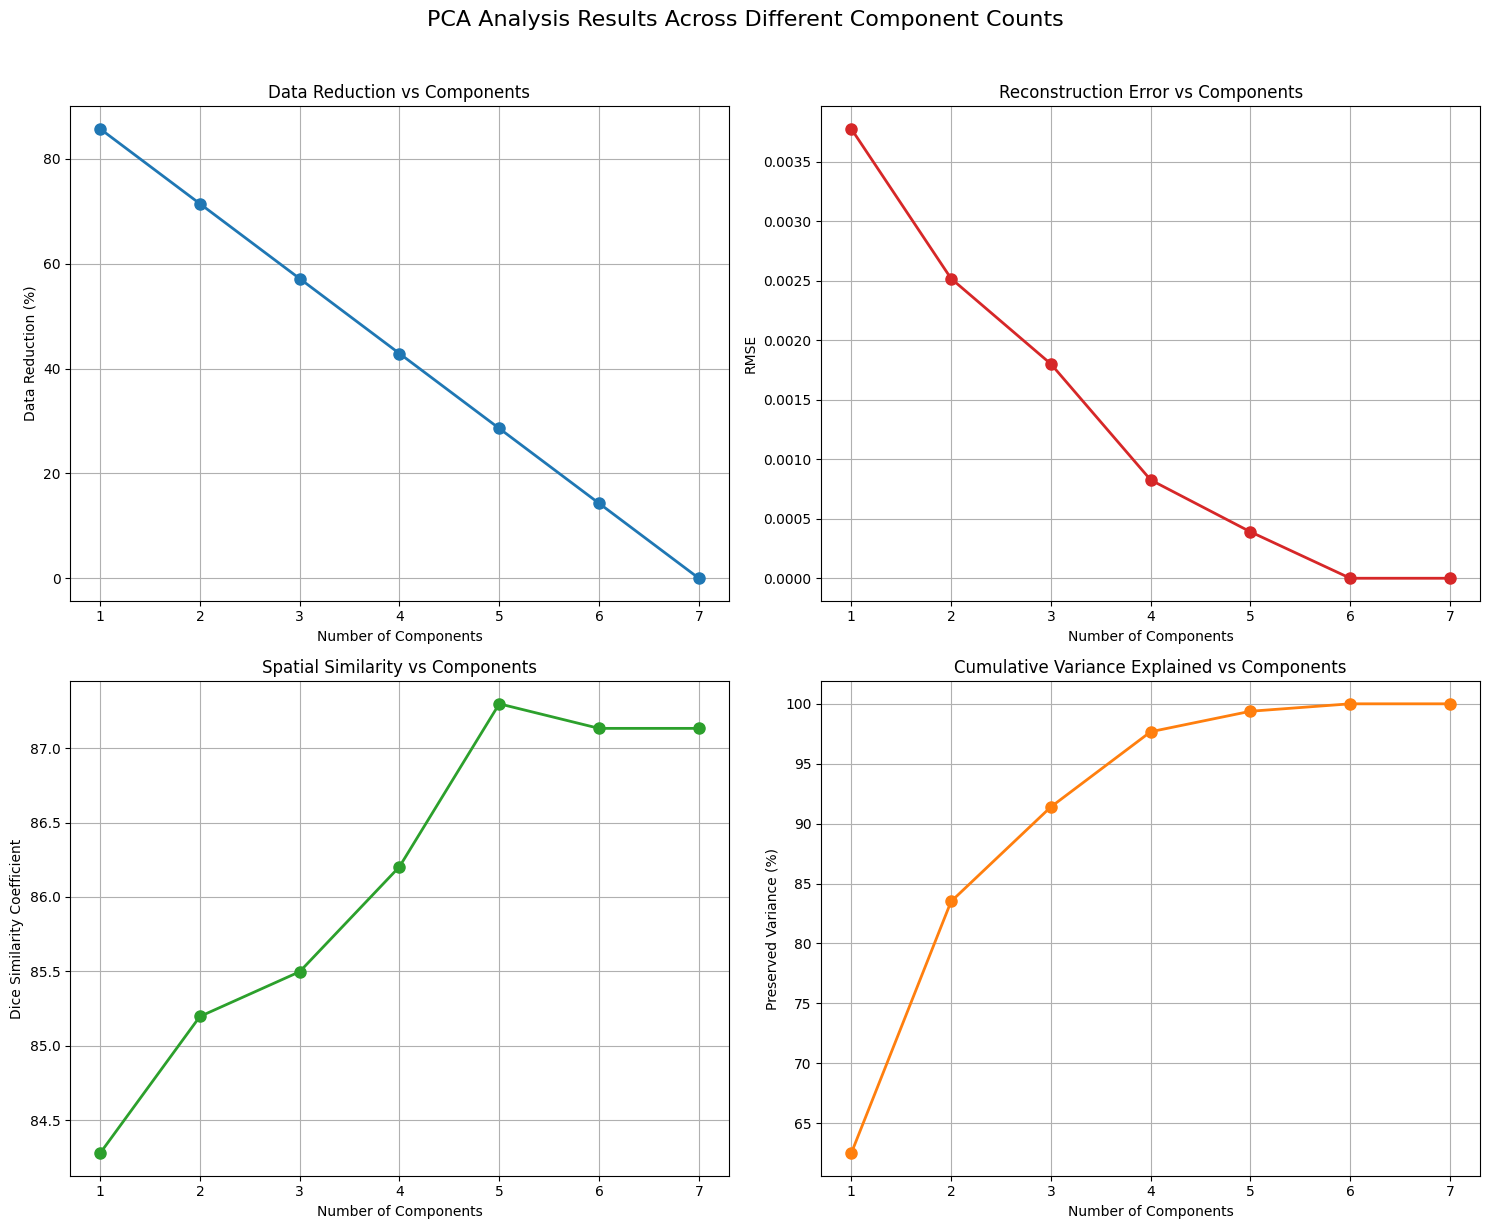


Detailed PCA Analysis Results:
   Components  Data Reduction (%)   RMSE  Dice Coefficient  Preserved Variance (%)
0           1             85.7143 0.0038           84.2790                 62.4912
1           2             71.4286 0.0025           85.1976                 83.5043
2           3             57.1429 0.0018           85.4983                 91.3945
3           4             42.8571 0.0008           86.2035                 97.6681
4           5             28.5714 0.0004           87.2974                 99.3787
5           6             14.2857 0.0000           87.1325                100.0000
6           7              0.0000 0.0000           87.1325                100.0000


In [57]:

# Run the PCA analysis
componentRange = np.arange(1, 8)
points, rmse, dice, variance, reconstructedDataMan = performPCA(shape_array, componentRange)

# Set up the plotting style
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
# Color palette for consistency
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange']    
# Plot 1: Data Reduction
ax1.plot(componentRange, points * 100, 'o-', color=colors[0], linewidth=2, markersize=8)
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Data Reduction (%)')
ax1.set_title('Data Reduction vs Components')
ax1.grid(True)
ax1.set_xticks(componentRange)
    
# Plot 2: RMSE
ax2.plot(componentRange, rmse, 'o-', color=colors[1], linewidth=2, markersize=8)
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('RMSE')
ax2.set_title('Reconstruction Error vs Components')
ax2.grid(True)
ax2.set_xticks(componentRange)
    
# Plot 3: Dice Coefficient
ax3.plot(componentRange, dice, 'o-', color=colors[2], linewidth=2, markersize=8)
ax3.set_xlabel('Number of Components')
ax3.set_ylabel('Dice Similarity Coefficient')
ax3.set_title('Spatial Similarity vs Components')
ax3.grid(True)
ax3.set_xticks(componentRange)
    
# Plot 4: Preserved Variance
ax4.plot(componentRange, variance * 100, 'o-', color=colors[3], linewidth=2, markersize=8)
ax4.set_xlabel('Number of Components')
ax4.set_ylabel('Preserved Variance (%)')
ax4.set_title('Cumulative Variance Explained vs Components')
ax4.grid(True)
ax4.set_xticks(componentRange)
    
# Add overall title and adjust layout
plt.suptitle('PCA Analysis Results Across Different Component Counts', fontsize=16, y=1.02)
plt.tight_layout()
    

# Create the visualization
plt.show()

# Print numerical results in a table
import pandas as pd
results_df = pd.DataFrame({
    'Components': componentRange,
    'Data Reduction (%)': points * 100,
    'RMSE': rmse,
    'Dice Coefficient': dice,
    'Preserved Variance (%)': variance * 100
})

print("\nDetailed PCA Analysis Results:")
print(results_df.to_string(float_format=lambda x: '{:.4f}'.format(x)))

### Investigation
Based on the principal component analysis that has been done on various number of principal components on the same dataset we can generalize the following:
* As we increase the number of principal components the data reduction decreases, which is logical since the essence of PCA is to minimize the dimensionality of the data by observing the variance among each of the dimensions and dispose the dimensions that doesn't have any meaningful information.  
* As we increase the number of principal components the Dice Coefficent of the original data and the reconstrcuted data increases. Dice Coefficient is a metric that is used to model the similarity between two datasets. Adding more component will allow the reconstrcuted data to have almost the same spatial information. However, it comes with the cost of dimensionality of the data and introducing data that would not contribute majorly on the data. Thus suffering the performance. We may notice that the dice coefficient reaches its climax when we have n = 5 and it decreases when n = 6, indicated that having 5 components captured much better information than having 6 components. This is somehow counter intuitive since the more data we have the better, but its not always the case. 
*  The reconstruction error decreases as we include much more dimensions, but it reaches to the point that the RMSE stays constant like when n = 6 and n = 7. This means that the introduction of the 7th dimension did not affect on the RMSE since its appromimates to absolute zero. 

In summary performing PCA comes with the cost of dimensionality of the data, amount of variance that we want to preserve from the original dataset, the similarity of two dataset, and the amount of reconstruction error found in the data.

**Q2 c (4 marks)** 

Research PCA analysis using the *scikit-learn* library. Perform PCA analysis and show the reconstructed data of any blood vessel shape on top of the original blood vessel shape. There are variables in the PCA object that correspond to the eigenvalues used for choosing projection eigenvectors. Compare the eigenvalues  and eigenvectors you have computed in the previous question with the eigenvalues  and the eigenvectors computed by the *scikit-learn* library. Compare the reconstructed coordinates from both methods. Comment on your results.

In [58]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

def performPCASci(inputdata: np.ndarray, componentRange: np.ndarray):
    nSamples = inputdata.shape[1]
    meanData = np.mean(inputdata, axis=1)
    centeredData = inputdata - meanData[:, np.newaxis]

    # Initialize the list to store the results
    nTests = len(componentRange)

    pointsUsed = np.zeros(nTests)
    rmseValues = np.zeros(nTests)
    diceValues = np.zeros(nTests)
    preservedVar = np.zeros(nTests)


    for idx, nComp in enumerate(componentRange):
        pca = PCA(n_components=nComp)
        projectedData = pca.fit_transform(centeredData.T)
        reconstructedData = pca.inverse_transform(projectedData).T + meanData[:, np.newaxis]
        # Append the reconstructed data to the list
        reconDataPoints = reconstructedData.copy()
        # Calculate the metrics for all of the samples
        totalOriginalPoints = inputdata.shape[0] * inputdata.shape[1]
        totalReconstPoints = inputdata.shape[0] * nComp
        pointsUsed[idx] = 1 - (totalReconstPoints / totalOriginalPoints)

        rmse = np.sqrt(mean_squared_error(inputdata, reconstructedData))
        rmseValues[idx] = rmse

        diceSimilarity = np.mean([
            diceSimilarityCoefficient(inputdata[:, i], reconstructedData[:, i]) for i in range(nSamples)
        ])
        diceValues[idx] = diceSimilarity

        percervedVariance = np.sum(pca.explained_variance_ratio_)
        preservedVar[idx] = percervedVariance
    
    return pointsUsed, rmseValues, diceValues, preservedVar, reconDataPoints


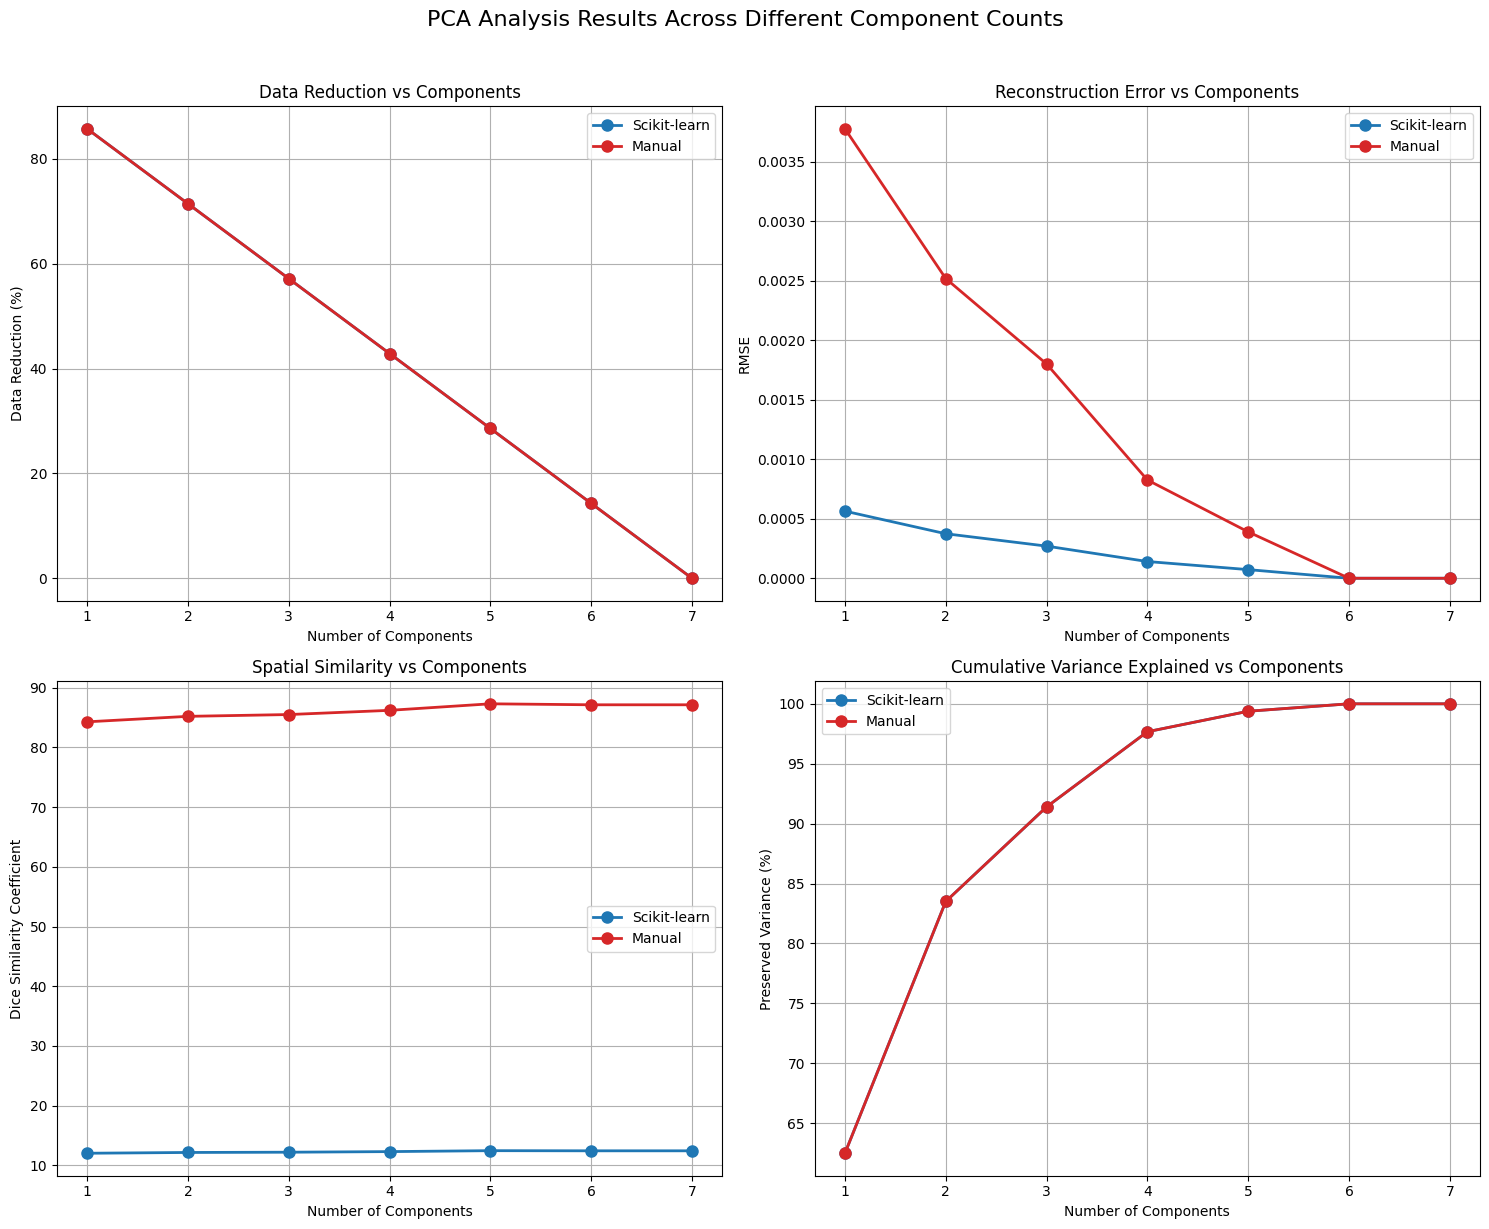


Detailed PCA Analysis Results:
   Components  Data Reduction (%)  RMSE (Sci)  RMSE (Manual)  Dice Coefficient (Sci)  Dice Coefficient (Manual)  Preserved Variance (%) (Sci)  Preserved Variance (%) (Manual)
0           1             85.7143      0.0006         0.0038                 12.0399                    84.2790                       62.4912                          62.4912
1           2             71.4286      0.0004         0.0025                 12.1710                    85.1976                       83.5043                          83.5043
2           3             57.1429      0.0003         0.0018                 12.2140                    85.4983                       91.3945                          91.3945
3           4             42.8571      0.0001         0.0008                 12.3148                    86.2035                       97.6681                          97.6681
4           5             28.5714      0.0001         0.0004                 12.4712         

In [60]:
# Run the PCA analysis using scikit-learn
pointSci,rmseSci,diceSci,varianceSci,manPoints = performPCASci(shape_array, componentRange)
pointMan,rmseMan,diceMan,varianceMan, sciPoints= performPCA(shape_array, componentRange)

# Set up the plotting style
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Data Reduction
axes[0, 0].plot(componentRange, pointSci * 100, 'o-', color='tab:blue', linewidth=2, markersize=8, label='Scikit-learn')
axes[0, 0].plot(componentRange, pointMan * 100, 'o-', color='tab:red', linewidth=2, markersize=8, label='Manual')
axes[0, 0].set_xlabel('Number of Components')
axes[0, 0].set_ylabel('Data Reduction (%)')
axes[0, 0].set_title('Data Reduction vs Components')
axes[0, 0].grid(True)
axes[0, 0].set_xticks(componentRange)
axes[0, 0].legend()

# Plot 2: RMSE
axes[0, 1].plot(componentRange, rmseSci, 'o-', color='tab:blue', linewidth=2, markersize=8, label='Scikit-learn')
axes[0, 1].plot(componentRange, rmseMan, 'o-', color='tab:red', linewidth=2, markersize=8, label='Manual')
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('Reconstruction Error vs Components')
axes[0, 1].grid(True)
axes[0, 1].set_xticks(componentRange)
axes[0, 1].legend()

# Plot 3: Dice Coefficient
axes[1, 0].plot(componentRange, diceSci, 'o-', color='tab:blue', linewidth=2, markersize=8, label='Scikit-learn')
axes[1, 0].plot(componentRange, diceMan, 'o-', color='tab:red', linewidth=2, markersize=8, label='Manual')
axes[1, 0].set_xlabel('Number of Components')
axes[1, 0].set_ylabel('Dice Similarity Coefficient')
axes[1, 0].set_title('Spatial Similarity vs Components')
axes[1, 0].grid(True)
axes[1, 0].set_xticks(componentRange)
axes[1, 0].legend()

# Plot 4: Preserved Variance
axes[1, 1].plot(componentRange, varianceSci * 100, 'o-', color='tab:blue', linewidth=2, markersize=8, label='Scikit-learn')
axes[1, 1].plot(componentRange, varianceMan * 100, 'o-', color='tab:red', linewidth=2, markersize=8, label='Manual')
axes[1, 1].set_xlabel('Number of Components')
axes[1, 1].set_ylabel('Preserved Variance (%)')
axes[1, 1].set_title('Cumulative Variance Explained vs Components')
axes[1, 1].grid(True)
axes[1, 1].set_xticks(componentRange)
axes[1, 1].legend()

# Add overall title and adjust layout
plt.suptitle('PCA Analysis Results Across Different Component Counts', fontsize=16, y=1.02)
plt.tight_layout()

# Create the visualization
plt.show()

# Print numerical results in a table
results_df = pd.DataFrame({
    'Components': componentRange,
    'Data Reduction (%)': pointSci * 100,
    'RMSE (Sci)': rmseSci,
    'RMSE (Manual)': rmseMan,
    'Dice Coefficient (Sci)': diceSci,
    'Dice Coefficient (Manual)': diceMan,
    'Preserved Variance (%) (Sci)': varianceSci * 100,
    'Preserved Variance (%) (Manual)': varianceMan * 100
})

print("\nDetailed PCA Analysis Results:")
print(results_df.to_string(float_format=lambda x: '{:.4f}'.format(x)))

# Convert manPoints to a numpy array
manPoints = np.array(manPoints)
print(manPoints.shape)

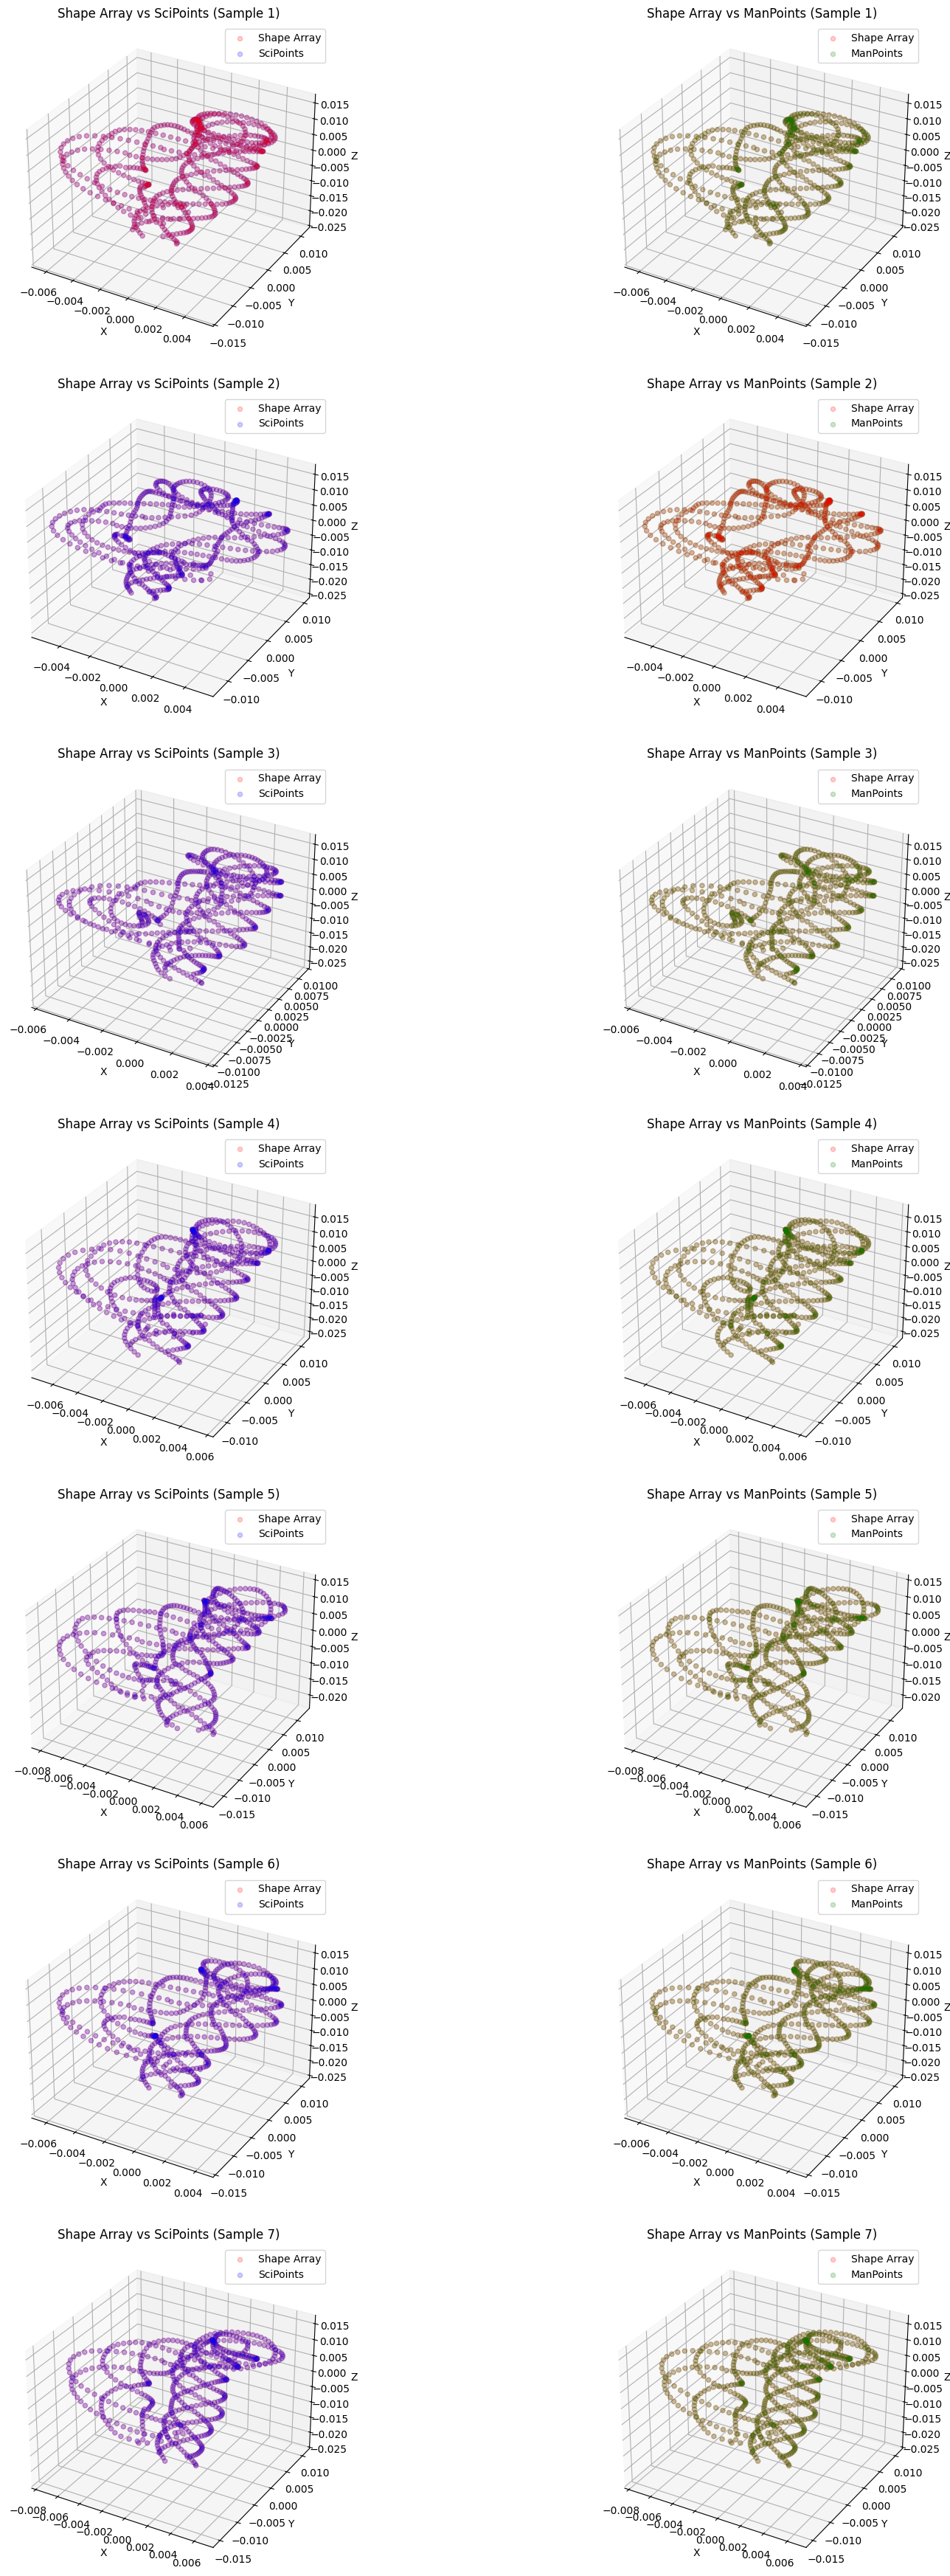

In [63]:
fig = plt.figure(figsize=(20, 35))

for i in range(7):  
    # Left subplot - shape_array vs sciPoints
    ax1 = fig.add_subplot(7, 2, 2*i + 1, projection='3d')
    
    # Extract points for shape_array
    shape_points = shape_array[:, i]
    x1, y1, z1 = shape_points[0::3], shape_points[1::3], shape_points[2::3]
    
    # Extract points for sciPoints
    sci_points = sciPoints[:, i]
    x2, y2, z2 = sci_points[0::3], sci_points[1::3], sci_points[2::3]
    
    # Create the scatter plots
    ax1.scatter(x1, y1, z1, label='Shape Array', alpha=0.2, color='red')
    ax1.scatter(x2, y2, z2, label='SciPoints', alpha=0.2, color='blue')
    
    # Set labels and title
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title(f'Shape Array vs SciPoints (Sample {i+1})')
    ax1.legend()
    
    # Right subplot - shape_array vs manPoints
    ax2 = fig.add_subplot(7, 2, 2*i + 2, projection='3d')
    
    # Extract points for manPoints
    man_points = manPoints[:, i]
    x3, y3, z3 = man_points[0::3], man_points[1::3], man_points[2::3]
    
    # Create the scatter plots
    ax2.scatter(x1, y1, z1, label='Shape Array', alpha=0.2, color='red')
    ax2.scatter(x3, y3, z3, label='ManPoints', alpha=0.2, color='green')
    
    # Set labels and title
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title(f'Shape Array vs ManPoints (Sample {i+1})')
    ax2.legend()

# Adjust the layout to prevent overlap
plt.tight_layout(h_pad=3.0, w_pad=1.0)

# Show the plot
plt.show()

Based on the results above we can conclude that the performance of the manual PCA and scikit's version of PCA are approximately the same . However they difference a lot when it comes to numerical stability. The key observation is the error RMSE of both approaches differs majorly when we are dealing with one principal component. However, they both converges when we get to larger number of principal components. This indicates that scikit learn is much more numerically stable than manual PCA since the graident between difference between the two components in a scikit learn version of PCA is minimal compared to the manual PCA. On the other hand, manual PCA has achieved better simialrity of the reconstrcuted data than the scikit-learn version as shown in the graph (lower-left). The manual implementation achived a similarity score around 84-86 % while the scikit learn acheived 12%. Thus indicating that there is a discripincy when reconstrcuting the data. Lastly, we could observe that both implementations agreed on the variance which means that both methods are capturing the fundamental properties accurately.